# [**Classez et segmentez des données visuelles**](https://openclassrooms.com/fr/courses/4470531-classez-et-segmentez-des-donnees-visuelles)

* **ID** : 4470531
* **Grade** : OC DS P6
* **Durée** : 15 heures
* **Difficulté** : Difficile
* **Séquence** : 3 + 5 + 5
* **Enseignants** :
    * *Pascal Monasse* - Docteur en mathématiques appliquées, chercheur en vision par ordinateur à l'École des Ponts ParisTech.
    * *Kimia Nadjahi* - Ingénieure en Machine Learning et vision par ordinateur. Enseignante à OpenClassrooms.


# Introduction

Bienvenue dans le cours de vision par ordinateur ! Dans ce cours, vous allez apprendre à classifier des images à l'aide des algorithmes issus du *Machine Learning*, en particulier de l'apprentissage supervisé (approche plutôt traditionnelle) et du *Deep Learning* (approche très moderne).

La première partie vous permettra d'acquérir les bases en **traitement d'images**, en particulier les opérations de lissage avec les filtres. Dans une deuxième partie, vous découvrirez la notion fondamentale de ***features*** en vision, et étudierez les méthodes classiques de **détection et de description de *features***. Vous pourrez alors développer votre premier algorithme de classification d'images, en entraînant un algorithme d'apprentissage supervisé sur les *features* extraites. Enfin, la troisième partie est dédiée aux fameux **réseaux de neurones convolutifs** (CNN), qui constituent aujourd'hui les algorithmes les plus performants pour classer des images.

## Objectifs pédagogiques

* Pré-traiter les images avec les techniques du traitement d'images (améliorer la luminosité, éliminer le bruit...)
* Comprendre la notion de *features* d'une image
* Maîtriser les méthodes les plus courantes d'extraction de *features*, en particulier l'algorithme SIFT
* Classifier des images avec les algorithmes de l'apprentissage supervisé
* Classifier des images avec les **réseaux de neurones convolutifs** (*Deep Learning*), en particulier avec la technique de *Transfer Learning*
* Maîtriser la bibliothèque **Keras**, qui permet de faire du *Deep Learning* en Python

## Prérequis

Ce cours fait partie du parcours Data Scientist. Il se situe au croisement des mathématiques et de l'informatique. Pour en profiter pleinement, n'hésitez pas à vous rafraîchir la mémoire, avant ou pendant le cours, sur :

* **Python** pour le calcul numérique (numpy) et la création de graphiques (pyplot), que nous utiliserons dans les parties TP du cours
* Quelques notions d'**algèbre linéaire** : manipulation de vecteurs, multiplications de matrices, normes, et valeurs/vecteurs propres
* Quelques notions de **probabilités** et **statistiques**, telles que distribution de loi de probabilité et variance
* [Les méthodes supervisées linéaires](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire)
* [Les méthodes supervisées non-linéaires](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires), en particulier les [réseaux de neurones](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4730716-entrainez-un-reseau-de-neurones-simple)

Outils nécessaires : 
* [**Pillow**](https://pillow.readthedocs.io/en/stable/)
* la bibliothèque Keras

## Plan

* Partie 1 - Améliorez l’aspect visuel de vos images
    1. Comprenez comment un ordinateur voit une image
    2. Appliquez vos premiers traitements d'images
    3. Filtrez une image
* Partie 2 - Détectez et décrivez efficacement les zones d’intérêts dans une image
    1. Découvrez la notion de "features" dans une image
    2. Détectez les coins et les bords dans une image
    3. Décrivez efficacement les features détectées avec SIFT
    4. Utilisez ces features pour classifier des images
    * Quiz : Partie 2
* Partie 3 - Classifiez les images à l’aide de réseaux de neurones convolutifs
    1. Qu'est ce qu'un réseau de neurones convolutif (ou CNN) ?
    2. Découvrez les différentes couches d'un CNN
    3. Apprenez à construire un CNN et gagnez du temps avec le Transfer Learning
    4. TP : Implémentez votre premier réseau de neurones avec Keras
    * Quiz : Partie 3

# Comprenez comment un ordinateur voit une image

Vidéo introductive par Pascal Monasse : https://vimeo.com/333929577

❓Qu'est-ce qu'une image ?

Cette question simple admet en réalité plusieurs réponses, plus ou moins techniques, selon le domaine étudié. Commençons par donner la réponse qui vient naturellement à la majorité d'entre nous : une image est une représentation visuelle de quelque chose ou de quelqu'un.

<figure id="r-5055807" data-claire-element-id="32283593"><img id="r-5020002" data-claire-element-id="9389962" src="https://user.oc-static.com/upload/2018/02/02/15175839474206_Lenna.png" alt="Portrait de Lena" /><figcaption>Lena, l'exemple canonique du traitement d'images</figcaption></figure>

📌 Si vous êtes déjà un peu familier avec le domaine du traitement d'images, vous savez que je n'ai pas choisi cet exemple au hasard : il s'agit de **Lena**, une image très largement utilisée dans le monde entier pour tester les algorithmes de traitement d'images, et ce depuis les années 1970 ! 

Dès la fin de ce chapitre, vous pourrez participer à cette tradition en étudiant les transformations apportées par divers algorithmes à ce joli portrait. Mais pour cela, il convient de partir sur de solides bases, donc reprenons doucement depuis le début.

Le **traitement d'images** désigne l'ensemble des techniques permettant de modifier une image, souvent dans le but de l'améliorer – par exemple, on peut la rendre plus lumineuse ou plus nette. Cette discipline se situe à la croisée des mathématiques appliquées et de l'informatique, c'est pourquoi nous nous intéresserons désormais à la définition d'une image dans ces deux domaines.

**En mathématiques, une image est une fonction**. Cette fonction quantifie l'intensité lumineuse de n'importe quel point dans l'image. Dans une image en noir et blanc, l'intensité est le **niveau de gris** : plus un point est sombre, plus son niveau de gris est faible.

Comme une image est une surface délimitée du plan, on peut se munir d'un repère cartésien et repérer la position de ses points par les coordonnées $(x, y)$, avec $x$ son abscisse et $y$ son ordonnée. Plus formellement, l'image comme fonction mathématique s’écrit comme ceci :

$$
\begin{matrix}
I\;: & \mathbb{R}^2 & \rightarrow & \mathbb{R} \\
    & (x,y) & \mapsto & I(x,y)
\end{matrix}
$$

❓Et si mon image est en couleurs ?

Dans ce cas, l'intensité d'un point désigne sa couleur. Celle-ci peut être perçue comme un mélange des trois couleurs primaires (rouge, vert et bleu). Ainsi, une image ne correspond non plus à une seule fonction, mais à trois : on associe à chaque point son intensité de rouge, de vert et de bleu. Ces trois valeurs sont respectivement notées $r(x,y)$, $g(x,y)$ et $b(x,y)$ et stockées dans un vecteur colonne de taille trois, de sorte que l'image puisse être représentée comme une fonction vectorielle :

$$
\begin{matrix}
I\;:& \mathbb{R}^2 & \rightarrow & \mathbb{R}^3\ \\
    & (x,y)        & \mapsto     &
    \begin{bmatrix} r(x,y) \\
        g(x,y) \\
        b(x,y)
    \end{bmatrix} \\
\end{matrix}
$$

📌 En réalité, il existe plusieurs manières de décrire – ou "coder" – les couleurs sur trois nombres. La façon que nous venons de présenter correspond au modèle de l'**espace RGB** (Red Green Blue).

❗Dans ce cours, la luminosité d'un point fournit l'essentiel de l'information utile à propos de l'image, et la couleur n'apporte pas grand chose de plus. C'est pourquoi nous ne nous attardons pas plus longtemps sur la représentation théorique des couleurs, et nous présenterons les concepts importants sur des images converties en noir et blanc.

Nous avons ainsi introduit une définition rigoureuse de l'image, vue comme une fonction mathématique.

❓Mais pourquoi se compliquer la vie à rendre aussi abstrait un concept intuitif ?

En traitement d'images, on ne peut absolument pas se contenter de définir une image comme "quelque chose que l'on voit et qui représente une information". En effet, comme vous le verrez très bientôt, la modification d'une image fait intervenir des opérations mathématiques. Celles-ci sont formulées de manière beaucoup plus intelligible et précise si l'on considère l'objet auquel elles s'appliquent – l'image – comme un objet mathématique.

## L'image numérique

Je vous avais dit que le traitement d'images faisait intervenir des outils non seulement issus des mathématiques appliquées, mais aussi de l'informatique. La définition mathématique d'une image ne convient pas à un ordinateur : des restrictions doivent être imposées sur les ensembles de définition et d'arrivée de la fonction.

Dans notre définition mathématique, l'abscisse, l'ordonnée et l'intensité d'un point donné de l'image peuvent prendre n'importe quelle valeur réelle. C'est pourquoi nous parlons de **modèle continu**, ou d'**image analogique**.

❓Nous savons déjà qu'une image est une surface délimitée du plan. Est-ce alors pertinent d'attribuer une intensité lumineuse à tous les points de $\mathbb{R}^2$ si l'on cherche seulement à en décrire une petite zone ?

Eh bien non ! Affinons donc le domaine de définition, en gardant uniquement la portion utile du plan, c'est-à-dire un rectangle de largeur $w$ (*width*) et de hauteur $h$ (*height*) contenant l'image.

⚡ Cette définition mathématique ajustée présente toutefois des limites d'un point de vue pratique, car elle suppose que l'intensité lumineuse doit être définie en tout point du rectangle de dimension $h × w$.

D'une part, les capteurs des caméras et même nos yeux ne sont pas capables d'effectuer une infinité de mesures, à cause de leur **résolution** limitée – nous reviendrons sur ce terme très bientôt. D'autre part, un ordinateur ne peut comprendre que des données **numériques** (*digital* en anglais), autrement dit discrètes, qui présentent un nombre fini de valeurs.

Une image en informatique est ainsi une discrétisation – ou **numérisation** – de notre modèle continu : on l'appelle **image numérique**. Cette discrétisation se fait à la fois sur l'ensemble de définition de la fonction image (**échantillonnage**, ou *sampling* en anglais) et sur son ensemble d'arrivée (**quantification**).

❗L'**échantillonnage** consiste à découper notre image continue suivant une grille régulière et à associer une intensité à chacune de ses cellules, appelées pixels (contraction des mots anglais *picture element*). En d'autres termes, on procède à une discrétisation spatiale : seul un nombre fini de points de l'image continue est conservé.

La **quantification** consiste, quant à elle, à limiter le nombre de valeurs différentes que peut prendre l'intensité. Par exemple, les niveaux de gris concernent uniquement les entiers compris entre 0 (noir) et 255 (blanc), et les couleurs dans le modèle RGB sont déterminées par un triplet de niveaux de gris (rouge : (255,0,0), vert : (0,255,0) et bleu : (0,0,255)).

Une image numérique est une image échantillonnée et quantifiée. La définition formelle d'une image numérique en noir et blanc est donc la suivante :

$$
\begin{matrix}
I\;: & \{0,1,...,w-1\} \times \{0,1,...,h-1\} & \rightarrow & \{0,1,...,255\} \\
 & (x,y) & \mapsto & I(x,y)
\end{matrix}
$$

L'ordinateur traite une image comme une matrice d'entiers de taille $h×w$, contenant les niveaux de gris de ses pixels. 

Notons que si cette représentation est la plus courante pour afficher une image, la lire ou l'écrire dans un fichier, nous travaillerons généralement sur des images **sans** quantification (l'intensité est un nombre réel, ou plutôt son équivalent pour l'ordinateur, un nombre à virgule flottante) et nous n'appliquerons la quantification qu'à la fin.

📌 Une image numérique est caractérisée par sa **définition** et sa **résolution**.  

La **définition** correspond à la donnée hauteur $×$ largeur exprimée en pixels. 

La **résolution** désigne le nombre de pixels par unité de longueur de l'image analogique. Elle permet de mesurer la qualité de l'image obtenue après numérisation : plus la résolution est élevée, meilleure est la qualité de l'image.

❗Le nombre de **mégapixels** (1 mégapixel = 1 million de pixels) mis en avant par les fabricants d'appareils photos exprime la définition, et non la résolution. Par exemple, une définition de 6000 $×$ 4000 équivaut à 24 mégapixels.

Ne vous laissez plus berner : un plus grand nombre de mégapixels donne des photos de plus grande taille, mais pas forcément de meilleure qualité !

## Premières manipulations d'images en Python

Passons à la pratique ! L'objectif est d'apprendre à effectuer des manipulations d'images très basiques en Python et de mieux comprendre la notion d'image numérique avec un exemple concret.

Avant de commencer à coder, il faut choisir une image de test en noir et blanc. J'ai personnellement décidé de travailler avec la photo ci-dessous, enregistrée dans le fichier `simba.png` :

<figure id="r-5055810" data-claire-element-id="32283596"><img id="r-5023037" data-claire-element-id="9442735" src="https://user.oc-static.com/upload/2018/02/07/15180252235774_simba.png" alt="Légende" /><figcaption>Ok, c'est pas vraiment Simba</figcaption></figure>

❗Il existe plusieurs formats de fichiers pour stocker une image, comme les formats JPEG, PNG et TIFF. La différence se fait au niveau de la **compression** de l'image : la suite de bits représentant l'image numérique est transformée dans le fichier en une suite de bits plus courte, exprimant exactement les mêmes informations (**compression sans perte de données**, comme PNG et TIFF) ou des informations proches (**compression avec pertes**, comme JPEG).

C'est bon, vous avez trouvé votre image de test ? Alors, c'est parti !

📌Nous allons utiliser [**Pillow**](https://pillow.readthedocs.io/en/latest/), une bibliothèque de traitement d’images pour Python 3, très facile d'utilisation et comportant de jolies fonctionnalités. D'autres bibliothèques et langages de programmation permettent d'effectuer les opérations décrites dans cette section – libre à vous d'utiliser les outils que vous préférez !

Tout d'abord, nous devons importer le module Image de la bibliothèque Pillow. L'étape préalable indispensable à tout traitement est le chargement de l'image : cela se fait facilement avec la fonction `Image.open` . Nous pouvons ensuite afficher le résultat renvoyé par cette fonction afin de vérifier que l'image a bien été chargée :

In [8]:
from PIL import Image

# Charger l'image
img = Image.open("img/distressed-lena-image-1-scaled.jpg")

# Afficher l'image chargée
img.show()

A l’exécution de ce script, une petite fenêtre doit apparaître et afficher l'image du fichier `simba.png`. La variable `img` contient l'image numérique que notre ordinateur est en mesure de comprendre et traiter.

❗Pillow a été créée à partir de PIL (Python Imaging Library), une bibliothèque pour la manipulation d'images qui n'est plus maintenue aujourd'hui – pour les adeptes de Git, il s'agit d'un fork ! En pratique, Pillow s'utilise sous le même nom que PIL afin d'assurer la rétrocompatibilité.

Nous pouvons obtenir la taille de notre image, donnée en nombre de pixels :

In [9]:
# Récupérer et afficher la taille de l'image (en pixels)
w, h = img.size
print(f"Largeur : {w} px, hauteur : {h} px")

Largeur : 800 px, hauteur : 1500 px


Ce résultat signifie que l'image analogique a été découpée en 250 pixels sur la largeur et 263 pixels sur la hauteur pendant l'échantillonnage.

Maintenant, inspectons les valeurs de pixels. L'attribut `Image.mode` nous informe sur le format de pixel utilisé, autrement dit sur la façon dont la quantification a été faite. De plus, la méthode `Image.getpixel` permet de récupérer l'intensité associée au pixel à une position donnée.

In [10]:
# Afficher son mode de quantification
print(f"Format des pixels : {img.mode}")

# Récupérer et afficher la valeur du pixel à une position précise
px_value = img.getpixel((20,100))
print(f"Valeur du pixel situé en (20, 100) : {px_value}")

Format des pixels : RGB
Valeur du pixel situé en (20, 100) : (108, 60, 48)


📌 Le mode 'L' signifie que les intensités sont codées sur 8 bits, ce qui est équivalent aux 256 niveaux de gris d'une image en noir et blanc. Tous les modes possibles sont répertoriés dans la documentation de Pillow [ici](https://pillow.readthedocs.io/en/stable/handbook/concepts.html#modes).

❗ La méthode `Image.getpixel` prend en argument un tuple, dont la première valeur indique l'abscisse du pixel et la deuxième, son ordonnée. Par convention dans Pillow, le repère cartésien a pour origine le pixel le plus en haut à gauche de l'image, et **l'axe des ordonnées est orienté vers le bas**. 

De plus, n'oubliez pas que l'indexation en Python commence à 0 (et non pas à 1) !

Nous pouvons également récupérer d'un seul coup les valeurs de tous les pixels de l'image à l'aide de la bibliothèque numpy :

In [11]:
import numpy as np

# Récupérer les valeurs de tous les pixels sous forme d'une matrice
mat = np.array(img)

# Afficher la taille de la matrice de pixels
print(f"Taille de la matrice de pixels : {mat.shape}")

Taille de la matrice de pixels : (1500, 800, 3)


On retrouve bien la représentation introduite dans la section précédente pour une image numérique en noir et blanc : nous avons une matrice de taille hauteur $×$ largeur où chaque élément contient un entier compris entre 0 et 255 afin d'indiquer le niveau de gris du pixel associé.

**!** Attention à l'inversion ligne/colonne et abscisse/ordonnée : l'intensité du pixel d'abscisse $x$ et d'ordonnée $y$ correspond à l'élément de la matrice situé à la $y$-ème ligne et $x$-ème colonne ! 

# Appliquez vos premiers traitements d'images

## Manipulations d'histogrammes

Nous abordons ici les techniques de traitement d'images basées sur la modification d'histogrammes. Ces méthodes font partie de la classe des traitements dits **ponctuels** : la valeur de chaque pixel est corrigée, et ce indépendamment des autres pixels.

❓ Qu'est ce qu'un histogramme dans le domaine de l'imagerie numérique ?

L'**histogramme** d'une image numérique est une courbe statistique représentant la répartition de ses pixels selon leur intensité. Pour une image en noir et blanc, il indique en abscisse le niveau de gris (entier entre 0 et 255) et en ordonnée, le nombre de pixels ayant cette valeur.

Lorsque l'histogramme est *normalisé*, il indique en ordonnée la probabilité $p_i$ de trouver un pixel de niveau de gris $i$ dans l'image :

$$
\forall i \in \{0,...,255\},\ p_i = \frac{\text{nombre de pixels d'intensité } i}{\text{nombre total de pixels}}
$$

Un **histogramme cumulé normalisé** calcule le pourcentage de pixels ayant une valeur inférieure à un niveau de gris donné :
$$
\forall i \in \{0,...,255\},\ P_i = \sum_{k=0}^i p_k
$$

L'histogramme normalisé peut être interprété comme une densité de probabilité, et l'histogramme cumulé normalisé comme la fonction de répartition.

La génération d'histogrammes se fait aisément en Python avec la fonction `hist` de `matplotlib.pyplot` :

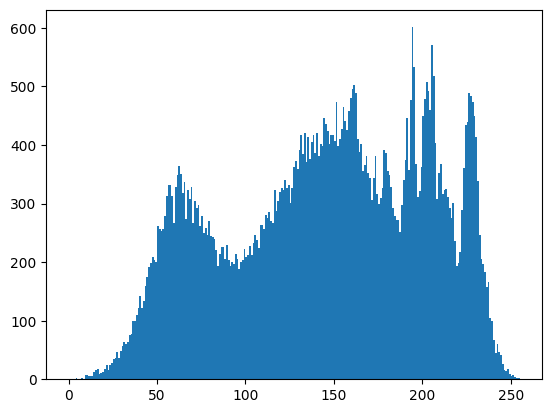

In [14]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Charger l'image comme matrice de pixels
img = np.array(Image.open("img/15180252235774_simba.png"))

# Générer et afficher l'histogramme
# Pour le normaliser : argument density=True dans plt.hist
# Pour avoir l'histogramme cumulé : argument cumulative=True
n, bins, patches = plt.hist(img.flatten(), bins=range(256))
plt.show()

<figure id="r-5031125" data-claire-element-id="9419201"></figure><figure id="r-5050426" data-claire-element-id="9466861"></figure><figure id="r-6319089" data-claire-element-id="29324983"><img id="r-5050427" data-claire-element-id="9466862" src="https://user.oc-static.com/upload/2018/02/12/15184391270465_montage_simba_hist.png" alt="Notre image et son histogramme" /><figcaption>Notre image et son histogramme</figcaption></figure>

Il s'agit d'un outil très important en traitement d'images, car sa modification permet d'ajuster la dynamique des niveaux de gris ou des couleurs dans une image afin de la rendre plus agréable visuellement. Grossièrement, à gauche se situent les pixels noirs, à droite les pixels blancs, et au milieu, toutes les nuances de gris.

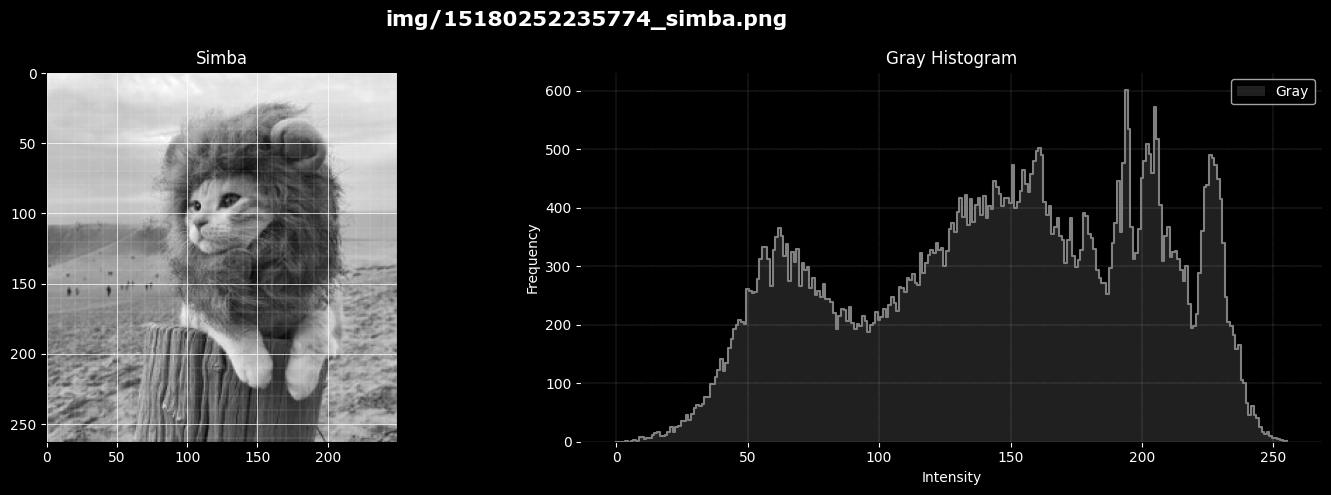

In [5]:
from img_processing import show_img_and_hist
img_dir = 'img/'
simba_filename = '15180252235774_simba.png'
show_img_and_hist(img_dir + simba_filename, img_name='Simba')

## Étirement d’histogrammes

Une première application consiste à corriger la luminosité, ou **exposition**, de l'image. Analysons la forme des histogrammes pour des images dont l'exposition est mauvaise :

<figure id="r-6319091" data-claire-element-id="29324985"><img id="r-5050522" data-claire-element-id="9467143" src="https://user.oc-static.com/upload/2018/02/12/15184400011184_montage_simba_sousexp.png" alt="Notre image sous-exposée et son histogramme" /><figcaption>Notre image sous-exposée et son histogramme</figcaption></figure>

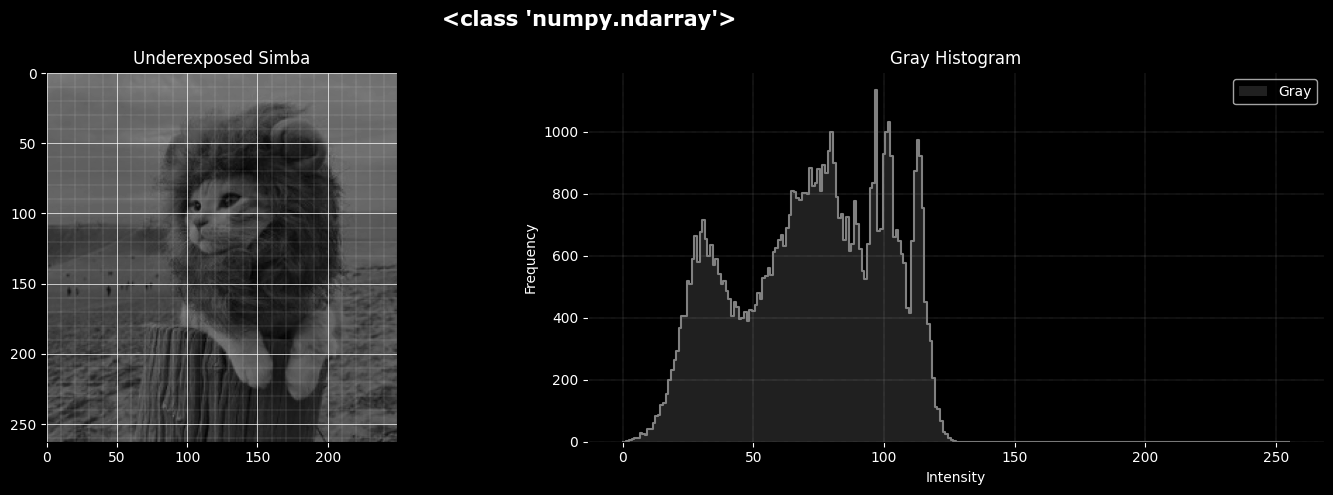

In [3]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
dark_simba_imx = change_img_exposure(simba_imx, .5, 0)
show_img_and_hist(dark_simba_imx, img_name='Underexposed Simba')

Vous pouvez constater que pour l'image trop sombre, ou sous-exposée, la majorité des pixels se situent dans la partie gauche de l'histogramme, vers les valeurs de niveaux de gris faibles.

<figure id="r-6319093" data-claire-element-id="29324987"><img id="r-5050526" data-claire-element-id="9467148" src="https://user.oc-static.com/upload/2018/02/12/15184400439637_montage_simba_surexp.png" alt="Notre image sur-exposée et son histogramme" /><figcaption>Notre image sur-exposée et son histogramme</figcaption></figure>

Inversement, les pixels de l'image trop claire, ou **sur-exposée**, se concentrent dans la partie droite de l'histogramme.

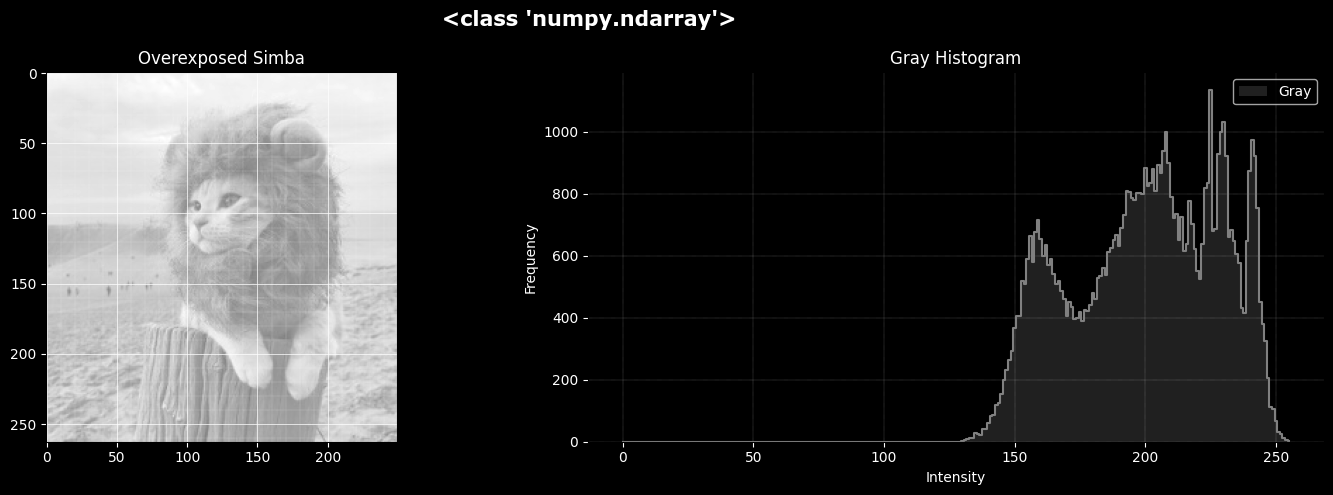

In [4]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
dark_simba_imx = change_img_exposure(simba_imx, .5, 1)
show_img_and_hist(dark_simba_imx, img_name='Overexposed Simba')

En revanche, l’histogramme associé à l’image dont l’exposition est relativement bonne présente une répartition des pixels sur tout l’intervalle [0,255]. Ainsi, pour corriger les défauts liés à l’exposition d'une image, il suffit simplement d'**étirer son histogramme** : l'objectif est d'étendre les valeurs des niveaux de gris de l'image mal exposée, majoritairement répartis dans un sous intervalle $[I_{min}, I_{max}] \subset [0,255]$, à tout l'intervalle disponible. 

Cette transformation se fait simplement à l’aide de la règle de trois : la valeur de chaque pixel est remplacée par le résultat de la formule ci-dessous.

$$
I'(x,y) = \dfrac{255 \times (I(x,y) - I_{min})}{I_{max} - I_{min}}
$$

où $I(x,y)$ et $I′(x,y)$ désignent les intensités du pixel de coordonnées $(x,y)$ respectivement dans l'image mal exposée et la nouvelle image.

Concrètement, cette formule mathématique signifie qu'on déplace les niveaux de gris de $[I_{min}, I_{max}]$ vers $[0, I_{max} - I_{min}]$, avant de les répartir dans $[0,255]$. 

En pratique, $I_{min}$ et $I_{max}$ sont souvent déterminées comme les niveaux de gris minimum et maximum de l'image après avoir éliminé 1% des valeurs extrêmes.

Et c'est tout ! L'étirement d'histogramme se fait avec la fonction `autocontrast` du module `ImageOps` de Pillow. On l'applique sur l'image sur-exposée :

<figure id="r-6319095" data-claire-element-id="29324989"><img id="r-5050630" data-claire-element-id="9467488" src="https://user.oc-static.com/upload/2018/02/12/15184408987377_montage_simba_surexp_c.png" alt="Notre image sur-exposée après étirement et son histogramme" /><figcaption>Notre image sur-exposée après étirement et son histogramme</figcaption></figure>

Le résultat est satisfaisant : les pixels se répartissent bien dans tout l'intervalle [0,255] et l'image présente une meilleure luminosité ! En guise de petit exercice, vous pouvez appliquer la transformation sur l'image trop sombre.

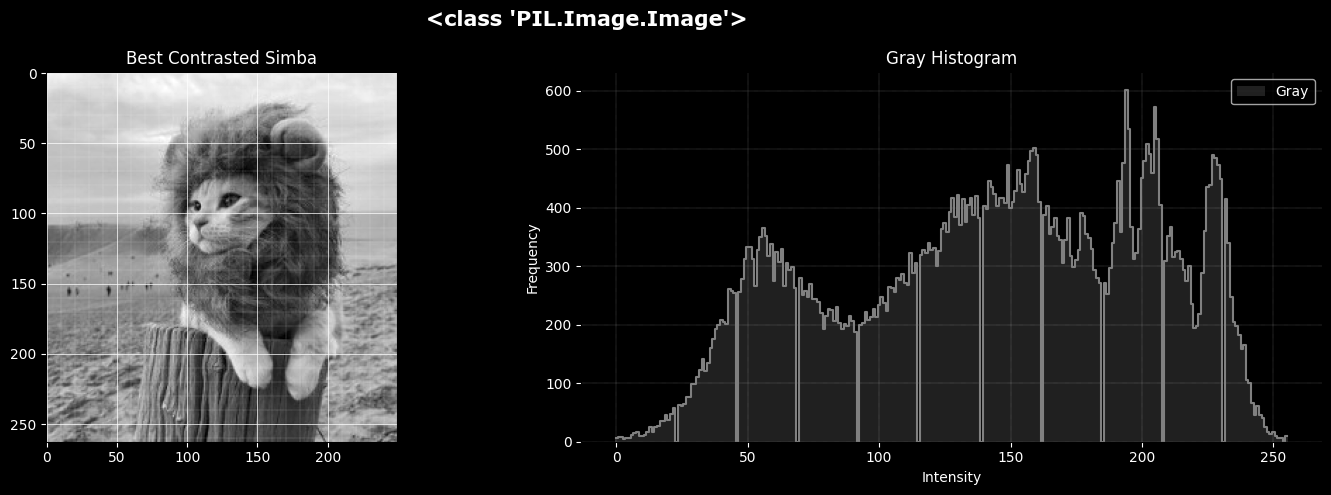

In [10]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
from PIL.Image import fromarray
from PIL.ImageOps import autocontrast
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
# dark_simba_imx = change_img_exposure(simba_imx, .5, 1)
# dark_simba_img = fromarray(dark_simba_imx).convert('L')
contrasted_simba_img = autocontrast(simba_img, cutoff=0.01)  # dark_simba_img) #
show_img_and_hist(contrasted_simba_img, img_name='Best Contrasted Simba')

## Égalisation d’histogrammes

La deuxième application courante concerne l'amélioration du **contraste** de l'image.

Le contraste caractérise la répartition de lumière dans une image : plus une image est contrastée, plus la différence de luminosité entre ses zones claires et sombres est importante. En général, une image peu contrastée est terne, tandis qu'une image trop contrastée est visuellement "agressive". Dans les deux cas, l'image manque de clarté car certains de ses détails seront peu, voire pas du tout, visibles.

L'**égalisation d'histogrammes** est une technique simple permettant de réajuster le contraste d'une image et ainsi de lui redonner du peps ou de l'adoucir. Pour comprendre de manière intuitive le fonctionnement de ce traitement, étudions l'allure de l'histogramme pour des images peu ou trop contrastées :

<figure id="r-6319098" data-claire-element-id="29324992"><img id="r-5050645" data-claire-element-id="9467520" src="https://user.oc-static.com/upload/2018/02/12/1518441010951_montage_simba_peucontr.png" alt="Notre image avec peu de contraste et son histogramme" /><figcaption>Notre image avec peu de contraste et son histogramme</figcaption></figure>

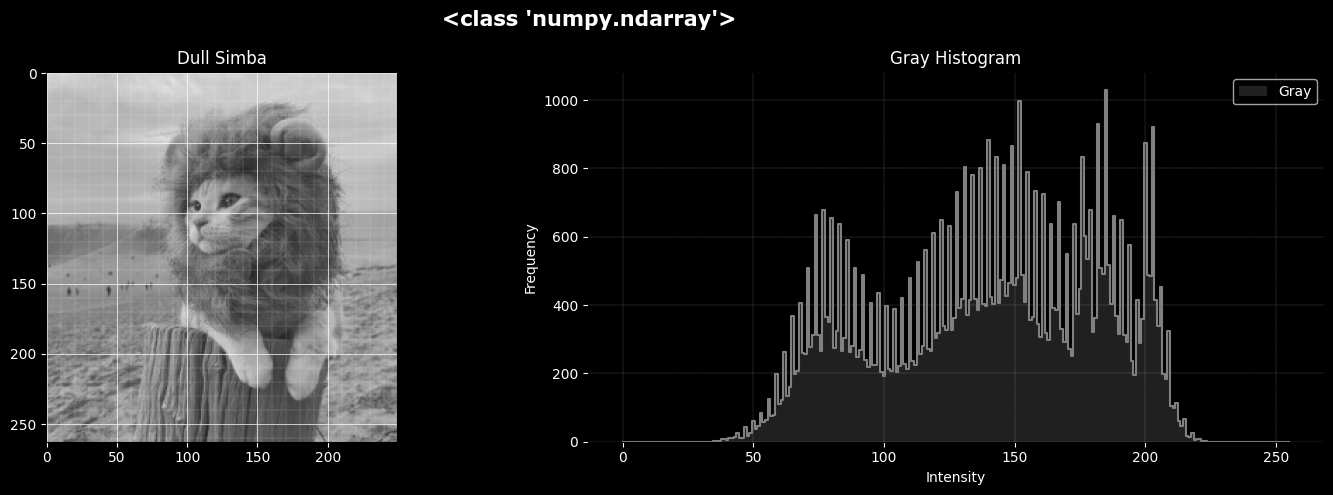

In [6]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
dull_simba_imx = change_img_exposure(simba_imx, .75, .5)
show_img_and_hist(dull_simba_imx, img_name='Dull Simba')

<figure id="r-6319100" data-claire-element-id="29324994"><img id="r-5050648" data-claire-element-id="9467523" src="https://user.oc-static.com/upload/2018/02/12/15184410376523_montage_simba_tropcontr.png" alt="Notre image avec trop de contraste et son histogramme" /><figcaption>Notre image avec trop de contraste et son histogramme</figcaption></figure>

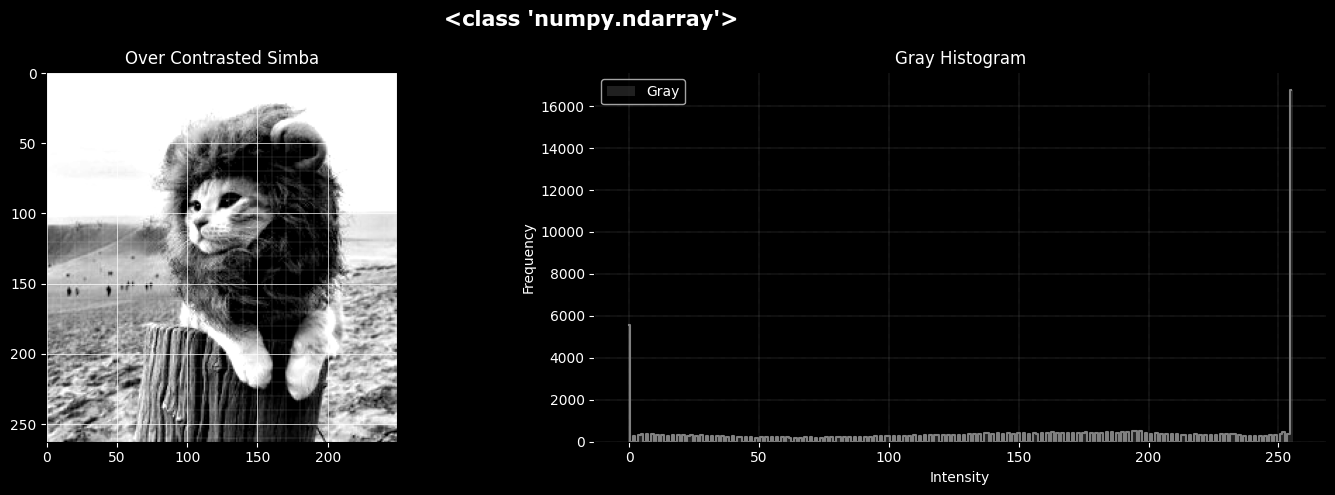

In [46]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
import numpy as np
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
contrasted_simba_imx = (simba_imx * 1.9 - 110)
contrasted_simba_imx = np.where(contrasted_simba_imx > 0, contrasted_simba_imx, 0)
contrasted_simba_imx = np.where(contrasted_simba_imx < 255, contrasted_simba_imx, 255)
show_img_and_hist(contrasted_simba_imx, img_name='Over Contrasted Simba')

Comme vous pouvez le constater, les pixels des images dont le contraste est mauvais se répartissent dans tout l'intervalle disponible mais pas de manière équitable. Un étirement d'histogramme n'améliorera donc rien.

L'objectif est donc d'harmoniser la distribution des niveaux de gris de l'image, de sorte que chaque niveau de l'histogramme contienne idéalement le même nombre de pixels. Concrètement, on essaye d'aplatir au maximum l'histogramme original.

Pour cela, nous calculons d'abord l'**histogramme cumulé normalisé** de l'image, puis nous ajustons la valeur de chaque pixel en utilisant la formule mathématique suivante :

$$
I'(x,y) = \lfloor255 . \sum_{i=0}^{I(x,y)} p_i\rfloor
$$

où $p_i$ désigne la probabilité qu'un pixel de l'image initiale soit d'intensité $i$. 

Pour mieux comprendre cette formule, rappelez-vous que le but est de répartir les niveaux de gris de l'image le plus équitablement possible sur $[0,255]$. Autrement dit, nous voulons imposer la loi de probabilité $I'(x,y)$ comme étant uniforme discrète sur cet intervalle. Nous exploitons alors la loi de $I(x,y)$ : sa fonction de répartition, donnée par $\sum_{i=0}^{I(x,y)} p_i$, est multipliée par 255. Si l’on considère $I(x,y)$ et $I'(x,y)$ comme des variables aléatoires continues, respectivement $I_c(x,y)$ et $I'_c(x,y)$, il est prouvé mathématiquement que $I'_c(x,y)$ est uniformément distribuée sur $[0,255]$.

L'égalisation d'histogramme correspond à la fonction `PIL.ImageOps.equalize`. L'application de ce traitement sur l'image peu contrastée nous donne :

<figure id="r-6319102" data-claire-element-id="29324996"><img id="r-5050728" data-claire-element-id="9467805" src="https://user.oc-static.com/upload/2018/02/12/15184420919533_montage_simba_peucontr_c.png" alt="Notre image peu contrastée après égalisation et son histogramme" /><figcaption>Notre image peu contrastée après égalisation et son histogramme</figcaption></figure>

L'image est plus contrastée et son histogramme confirme que la distribution de ses niveaux de gris est plus uniforme.

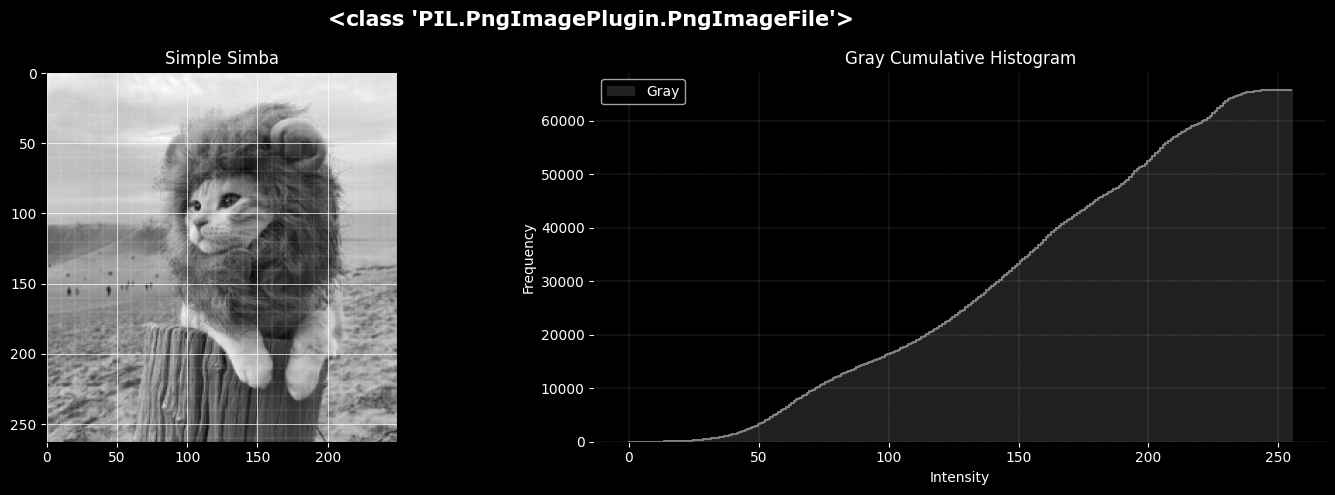

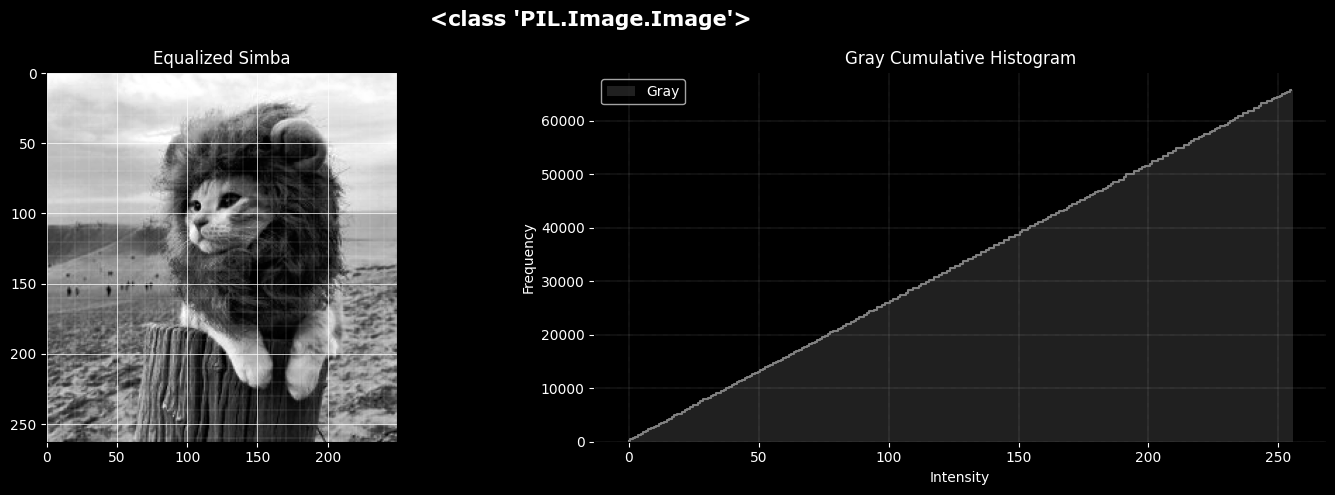

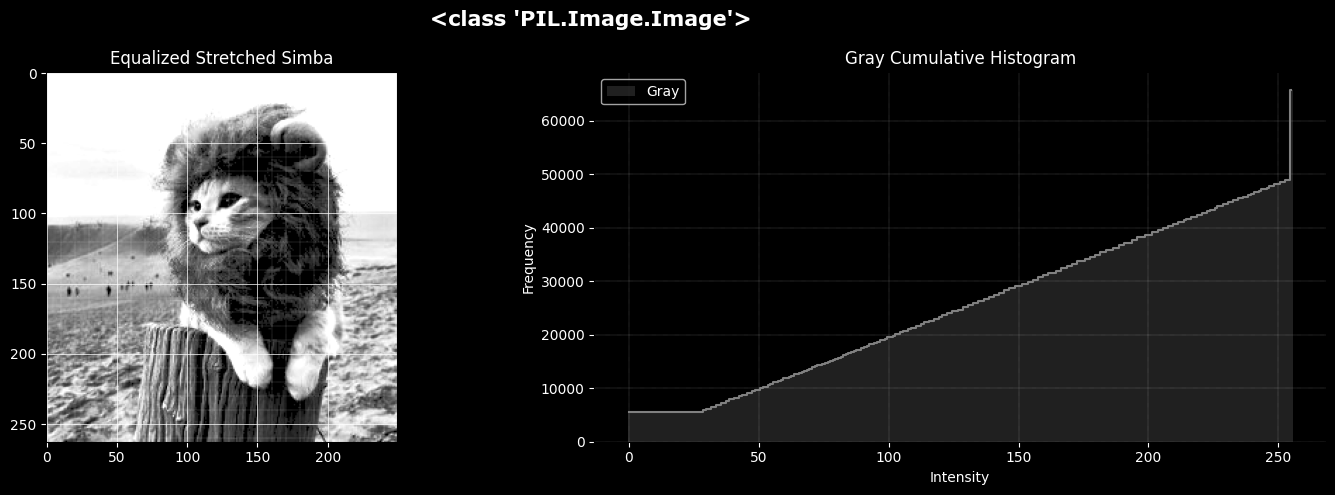

In [54]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
from PIL.Image import fromarray
from PIL.ImageOps import equalize, autocontrast
img_dir = "img/"
simba_filename = "15180252235774_simba.png"
simba_img, simba_imx = load_img(img_dir + simba_filename, silent=True)
# dark_simba_imx = change_img_exposure(simba_imx, .5, 1)
# dark_simba_img = fromarray(dark_simba_imx).convert('L')
#contrasted_simba_img = autocontrast(simba_img, cutoff=0.01)  # dark_simba_img) #
show_img_and_hist(simba_img, img_name='Simple Simba', cumulative=True)
show_img_and_hist(equalize(simba_img), img_name='Equalized Simba', cumulative=True)
stretched_simba_imx = (simba_imx * 1.9 - 110)
stretched_simba_imx = np.where(stretched_simba_imx > 0, stretched_simba_imx, 0)
stretched_simba_imx = np.where(stretched_simba_imx < 255, stretched_simba_imx, 255)
equalized_simba_img = equalize(fromarray(stretched_simba_imx).convert('L'))
show_img_and_hist(equalized_simba_img, img_name='Equalized Stretched Simba', cumulative=True)


❗ En pratique, les histogrammes après égalisation ne sont pas parfaitement plats, comme le montre l'exemple précédent. Cela est dû au fait que les intensités des pixels sont discrètes. En effet, la preuve mathématique énoncée ci-dessus part du principe que les intensités sont des variables aléatoires **continues**. Si cette hypothèse n'est pas vérifiée, on observe une distribution des intensités **plus uniforme** qu'avant égalisation, et non **parfaitement uniforme**.

Néanmoins, si l'histogramme de l'image corrigée n'est visiblement pas plat, l'histogramme cumulé normalisé montre que la fonction de répartition semble être linéaire comme celle de la loi uniforme :

<figure id="r-6319104" data-claire-element-id="29324998"><img id="r-5050734" data-claire-element-id="9467812" src="https://user.oc-static.com/upload/2018/02/12/1518442609971_simba_peucontr_c_cum_norm_hist.png" alt="L'histogramme cumulé normalisé de l'image peu contrastée après égalisation" /><figcaption>L'histogramme cumulé normalisé de l'image peu contrastée après égalisation</figcaption></figure>

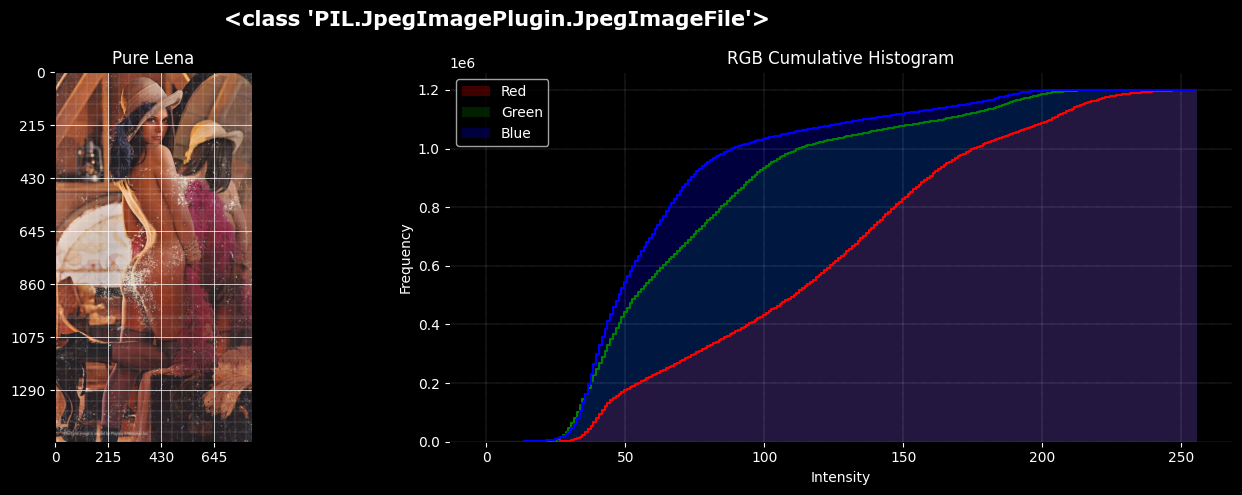

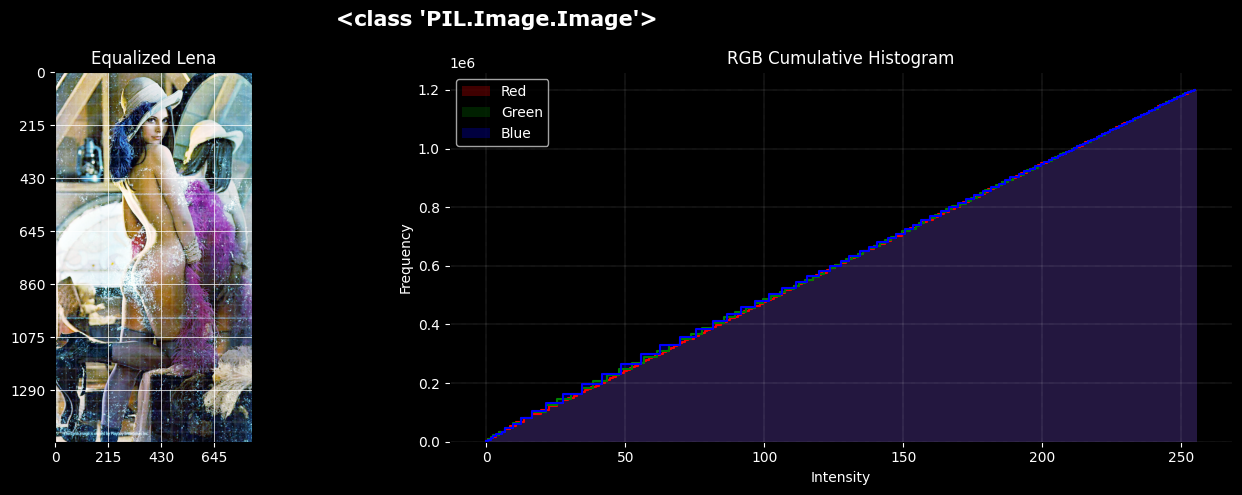

In [55]:
from img_processing import load_img, change_img_exposure, show_img_and_hist
from PIL.Image import fromarray
from PIL.ImageOps import equalize, autocontrast
img_dir = "img/"
full_lena_filename = "distressed-lena-image-1-scaled.jpg"
full_lena_img, full_lena_imx = load_img(img_dir + full_lena_filename, silent=True)
show_img_and_hist(full_lena_img, img_name='Pure Lena', cumulative=True)
show_img_and_hist(equalize(full_lena_img), img_name='Equalized Lena', cumulative=True)


## Transformations géométriques

Une autre catégorie de traitement ponctuel regroupe les **transformations géométriques**, qui modifient la position des pixels dans l'image. Une rotation, une translation ou un changement d'échelle (zoom) en sont des exemples typiques. 

Une transformation géométrique est caractérisée par une matrice et un vecteur réels, respectivement notés $T$
et $V$. Les nouvelles coordonnées $(x', y')$ du pixel de position initiale $(x, y)$ sont déterminées selon l'équation ci-dessous : 

$$
\begin{pmatrix} x' \\ y' \end{pmatrix} = T \begin{pmatrix} x \\ y \end{pmatrix} + V
$$

Plus précisément, les rotations, translations et zooms s'expriment de la manière suivante :
* **Translation** de vecteur $\begin{pmatrix} t_1 & t_2 \end{pmatrix}^\top$ : $\begin{pmatrix} x' \\ y' \end{pmatrix} = \begin{pmatrix} 1 & 0 \\ 0 & 1 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix} + \begin{pmatrix} t_1 \\ t_2 \end{pmatrix}$
* **Zoom** de coefficients $\lambda_1$ et $\lambda_2$ : $\begin{pmatrix} x' \\ y' \end{pmatrix} = \begin{pmatrix} \lambda_1 & 0 \\ 0 & \lambda_2 \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}$
* **Rotation** d'angle $\theta$ : $\begin{pmatrix} x' \\ y' \end{pmatrix} = \begin{pmatrix} \cos(\theta) & -\sin(\theta) \\ \sin(\theta) & \cos(\theta) \end{pmatrix} \begin{pmatrix} x \\ y \end{pmatrix}$

❗ Certaines nouvelles coordonnées risquent de sortir des bornes de l'image. Celle-ci doit alors être agrandie afin de pouvoir afficher tous les pixels qui se trouvent en dehors.

Rappelons qu'une image numérique est définie sur un ensemble discret : les coordonnées $(x, y)$ d'un pixel sont entières, de sorte que son intensité se trouve à la $y$-ème ligne et $x$-ème colonne de la matrice représentative.

Or, ces transformations, basées sur la géométrie euclidienne, sont définies dans un repère cartésien qui utilise des coordonnées réelles. Il s'agit donc d'une application qui va de $\mathbb{N}^2$ dans $\mathbb{R}^2$; par exemple, considérez une translation de vecteur $\begin{pmatrix} 0.5 & 0.5 \end{pmatrix}^\top$. Afin de pouvoir représenter l'image numérique transformée, il est nécessaire d'arrondir les nouvelles coordonnées réelles vers les entiers les plus proches.

Cependant, ces arrondis ne garantissent pas un parcours de tous les pixels de l'image finale. Celle-ci risque alors de présenter des "trous", dus aux valeurs manquantes de sa matrice. Pour éviter ce problème, on utilise la **transformation géométrique inverse**, qui permet de passer de l'image transformée à l'image originale :

$$
\begin{pmatrix} x'' \\ y ''\end{pmatrix} = T^{-1} \begin{pmatrix} x' \\ y' \end{pmatrix} - V
$$

Le pixel de coordonnées $(x', y')$ dans l'image transformée prend ainsi la valeur du pixel de coordonnées $(x'', y'')$ dans l'image initiale.

⚡ Pas compris, pas clair, formule d'inversion erronée.

❓ Mais... Ne risque-t-on pas, encore une fois, d'obtenir des coordonnées réelles en sortie ?

En fait, il faut coupler la transformation inverse avec une méthode d'interpolation, qui va associer à chaque couple de coordonnées dans l'image originale une valeur déterminée à partir des intensités des pixels voisins. Il existe deux modes d'interpolation principaux :
* L'**interpolation au plus proche voisin** : la nouvelle valeur est déterminée comme l'intensité du pixel le plus proche. Il s'agit de la technique d'interpolation la plus simple et la plus rapide, mais en contrepartie, elle offre une moins bonne qualité visuelle
* L'**interpolation bilinéaire** : la nouvelle valeur est calculée à partir des intensités des quatre pixels voisins

📌 Le module `PIL.Image` contient les méthodes permettant d'appliquer les transformations géométriques présentées : vous pouvez les retrouver dans la [documentation](https://pillow.readthedocs.io/en/stable/reference/index.html).

Leur paramètre d'entrée `resample` donne la possibilité de choisir le mode d'interpolation, et `expand` d'agrandir l'image au cas où des pixels se trouvent en dehors des bornes après transformation.

Comparons les effets des interpolations au plus proche voisin et bilinéaire avec une rotation (`PIL.Image.rotate`) :

<figure id="r-6319107" data-claire-element-id="29325002"><img id="r-5051589" data-claire-element-id="9508530" src="https://user.oc-static.com/upload/2018/02/16/15187967326095_simba_nearest_vs_bilinear.png" alt="Notre image après une rotation de 35° avec une interpolation au plus proche voisin (à gauche) et une interpolation bilinéaire (à droite)" /><figcaption>Simba après rotation avec une interpolation au plus proche voisin (à gauche) et une interpolation bilinéaire (à droite)</figcaption></figure>

Vous pouvez constater que l'interpolation bilinéaire donne effectivement une image de bien meilleure qualité que l'interpolation au plus proche voisin.

## Élimination du bruit

Enfin, la qualité d'une photo peut également être dégradée par du **bruit numérique**, c'est-à-dire par l'apparition aléatoire de "grains" superflus. Il s'agit d'un phénomène courant en photographie numérique, dû à un mauvais réglage de la sensibilité des capteurs de l'appareil photo, ou à une limitation de leurs capacités. 

Le bruit peut être vu comme une image constituée de pixels dont les intensités ont été déterminées de manière aléatoire.

Une image étant définie soit comme une fonction soit comme une matrice, nous pouvons appliquer des opérations mathématiques usuelles, comme l'addition. Ainsi, on parle de **bruit additif** lorsque l'image bruitée est la somme de l'image originale et du bruit.

L'intensité du pixel de coordonnées $(x, y)$ dans l'image bruitée est alors donnée par la relation :

$$
I'(x, y)=I(x, y)+\eta(x, y)
$$

où $I'(x, y)$, $I(x, y)$ et $\eta(x, y)$ désignent les intensités du pixel $(x, y)$ respectivement dans l'image bruitée, l'image originale et le bruit.

Un exemple très classique de bruit additif est le [**bruit gaussien**](https://en.wikipedia.org/wiki/Gaussian_noise), pour lequel les intensités sont choisies aléatoirement selon une loi normale : $\eta(x, y)$ suit la loi $\mathcal{N}(0, \sigma^2)$. Plus la variance est élevée, plus le bruit est visible dans l'image.

❗ Il existe d'autres types de bruits, comme le **bruit impulsionnel** : un certain pourcentage de pixels dans l'image est remplacé par une valeur tirée uniformément sur [0,255], ou bien par 0 ou 255 avec la même probabilité $\frac{1}{2}$ (bruit impulsionnel dit "**poivre et sel**").

Nous pouvons facilement générer du bruit gaussien dans une image. En Python, cela se fait avec la fonction `numpy.random.normal`, qui simule une variable aléatoire gaussienne : 

In [4]:
import numpy as np
from PIL import Image
# Charger l'image sous forme d'une matrice de pixels
img = np.array(Image.open('15180252235774_simba.png'))

# Générer le bruit gaussien de moyenne nulle et d'écart-type 7 (variance 49)
noise = np.random.normal(0, 7, img.shape)

# Créer l'image bruitée et l'afficher
noisy_img = Image.fromarray(img + noise).convert('L')
noisy_img.show()

<figure id="r-6319110" data-claire-element-id="29325005"><img id="r-5055380" data-claire-element-id="9508683" src="https://user.oc-static.com/upload/2018/02/16/15187971096606_simba_original_noisy.png" alt="Simba (à gauche) et Simba victime du bruit gaussien (à droite)" /><figcaption>Simba (à gauche) et Simba, victime du bruit gaussien (à droite)</figcaption></figure>

❓ Mais, l'image est devenue moins belle ! Comment est-ce qu'on se débarrasse du bruit ?

Plusieurs techniques de **débruitage** (ou **lissage**) ont été développées afin d'atténuer le bruit dans une image. Le **lissage par moyennage** désigne la solution la plus intuitive.

Ce qui rend l'image désagréable visuellement, c'est la présence de certains pixels qui ne semblent pas être en cohérence avec les autres éléments de la scène représentée : le bruit leur a donné des valeurs "aberrantes". Dans une image de bonne qualité, un pixel a généralement une intensité relativement similaire à celle de ses voisins.

Le lissage par moyennage consiste alors à remplacer la valeur de chaque pixel par l'intensité moyenne de son voisinage. Le voisinage est défini par une fenêtre carrée de taille impaire, centrée en le pixel à corriger. Le principe de cette méthode est schématisé ci-dessous :

<figure id="r-6319112" data-claire-element-id="29325007"><img id="r-5141601" data-claire-element-id="9718955" src="https://user.oc-static.com/upload/2018/03/13/15209710708846_liss_moy.png" alt="Fonctionnement du lissage par moyennage" /><figcaption>Fonctionnement du lissage par moyennage</figcaption></figure>

Comme la valeur de chaque pixel est modifiée en fonction des intensités de ses pixels voisins, il s'agit d'un **traitement local**.

❌ Ne confondez pas **traitements locaux** et **traitements ponctuels** : ces derniers corrigent la valeur d'un pixel sans prendre en compte son voisinage !

En Pillow, le lissage par moyennage est implémenté dans la classe `PIL.ImageFilter.BoxBlur` et il s'applique avec la méthode `PIL.Image.filter` : 

In [5]:
from PIL import ImageFilter

# Appliquer le lissage par moyennage (fenêtre de taille 9) et afficher le résultat
noisy_img.filter(ImageFilter.BoxBlur(1)).show()

<figure id="r-6319114" data-claire-element-id="29325009"><img id="r-5055396" data-claire-element-id="9508686" src="https://user.oc-static.com/upload/2018/02/16/15187971962851_simba_noisy_lissmoy3x3.png" alt="Débruitage de Simba" /><figcaption>Simba bruité (à gauche) et Simba lissé (à droite)</figcaption></figure>

Le bruit est bien atténué, mais en contrepartie, l'image est devenue floue – d'où l'appellation *BoxBlur* (*blur* = flou en anglais) dans Pillow !

❓ Ok, mais pourquoi le lissage s'applique avec une méthode nommée *filter* ? 

En réalité, le lissage par moyennage n'est qu'un exemple de **filtre**. Le chapitre suivant est consacré à cet outil fondamental en traitement d'images.

# 1.3 Filtrez une image

Dans le chapitre précédent, je vous avais introduit la problématique de réduction du bruit d'une image et présenté une première solution, le lissage par moyennage. Cette technique est en fait basée sur l'application d'un **filtre**.

Le **filtrage** constitue un volet important en traitement d'images, et un de ses objectifs principaux est de nettoyer l'image en éliminant le plus de bruit possible. Dans ce chapitre, nous allons nous intéresser davantage à cette classe de méthodes, et en particulier à la notion de **filtre linéaire**.

## Les filtres linéaires

Il existe différentes techniques de filtrage selon le type de bruit à atténuer. Le lissage par moyennage utilise un filtre linéaire et fait partie, en ce sens, de la classe de filtrage la plus simple.

Rappelons tout d'abord la notion de linéarité. Un opérateur $G$ est dit linéaire s'il vérifie les deux propriétés suivantes :
* **Additivité** : pour deux fonctions $u$ et $v$, $G(u+v)=G(u)+G(v)$
* **Homogénéité** : pour une fonction $u$ et une constante $\lambda$, $G(\lambda u)=\lambda G(u)$

En traitement d'images, et même plus généralement en traitement du signal, un filtre linéaire est un système qui transforme une image en utilisant un opérateur linéaire. Il s'agit généralement d'un traitement local.

Une propriété importante d'un filtre linéaire est l'invariance par translation : la modification d'un pixel dépend de son voisinage, et non de sa position dans l'image.

Le lissage par moyennage utilise bien un filtre linéaire, appelé **filtre moyenneur**. En effet, l'opération appliquée à l'image initiale de représentation matricielle $X$ pour obtenir l'image débruitée $Y$ est composée d'additions et d'une division :

$$
Y_{i,j} = \dfrac{X_{i-1,j-1} + X_{i-1,j} + X_{i-1,j+1} + X_{i,j-1} + X_{i,j} + X_{i,j+1} + X_{i+1,j-1} + X_{i+1,j} + X_{i+1,j+1}}{9}
$$

Comme je vous l'avais expliqué, ce lissage part du principe selon lequel chaque pixel dans une image de bonne qualité doit avoir une intensité similaire à celle de ses voisins. La moyenne arithmétique suppose même que chaque voisin contribue à part égale. Cela peut donner lieu à des incohérences, surtout si le nombre de voisins considéré est grand : il y a de plus grandes chances qu'un pixel soit corrigé en fonction de pixels qui décrivent des objets différents dans l'image, et qui ont donc peu de points communs avec lui !

Ainsi, nous pouvons améliorer le lissage par moyennage, en donnant des poids différents aux pixels dans la moyenne : les coefficients n'ont plus tous la même valeur et dépendent de la position du voisin par rapport au pixel central.

L'opération appliquée par ce filtre moyenneur "généralisé" s'écrit alors formellement de la façon suivante :

$$
\begin{align*}
Y_{i,j} =\ &H_{1,1} X_{i-1,j-1} &+\ &H_{1,0} X_{i-1,j} &+\ &H_{1,-1} X_{i-1,j+1} \\
+\ &H_{0,1} X_{i,j-1} &+\ &H_{0,0} X_{i,j} &+\ &H_{0,-1} X_{i,j+1} \\
+\ &H_{-1,1} X_{i+1,j-1} &+\ &H_{-1,0} X_{i+1,j} &+\ &H_{-1,-1} X_{i+1,j+1}
\end{align*}
$$

où les coefficients $H_{i,j}$ désignent les poids dans la moyenne. Vous pouvez constater qu'il s'agit toujours d'un filtre linéaire. 

En fait, il est possible de généraliser la forme de la transformation mathématique opérée par n'importe quel filtre linéaire : c'est l'objet de la prochaine section !

## L'opérateur de convolution

Un filtre linéaire remplace la valeur de chaque pixel en entrée par une combinaison linéaire des intensités de ses pixels voisins. L'opérateur permettant d’effectuer cette transformation est appelé **produit de convolution**. C'est pourquoi l'application d'un filtre linéaire est également connue sous le terme de filtrage par convolution. 

En notant $∗$ l'opérateur de convolution, la relation mathématique entre l'image initiale $X$ et l'image filtrée $Y$ pour tout type de filtre linéaire s'écrit $Y=H∗X$.  Cela revient à modifier la valeur de chaque pixel de la manière suivante :

$$
Y_{i,j} = \sum_{u=-k}^k \sum_{v=-k}^k H_{u,v}.X_{i-u, j-v}
$$

$H$ est le **noyau (ou masque) de convolution** : il s'agit d'une matrice carrée de taille impaire $2k+1$, qui caractérise le filtre linéaire appliqué. Par exemple, le lissage par moyennage sur un voisinage de taille $2k+1$ a pour noyau $H = \frac{1}{2k+1}\begin{bmatrix}1 & 1 & 1 \\ 1 & 1 & 1 \\ 1 & 1 & 1 \end{bmatrix}$

⚡ Il manque des $\cdots$ et $\vdots$

❗ Les éléments de $H$ ont été indexés de $−k$ à $k$ afin de pouvoir visualiser facilement l'opération : le filtrage par convolution revient à balayer l'image par une fenêtre d'analyse de taille finie, centrée en le pixel à modifier.

Cette formule correspond bien à une généralisation de la transformation opérée par le filtre moyenneur "perfectionné" : pour vous en convaincre, prenez $k = 1$ et réécrivez chaque terme de la double somme. Les coefficients de $H$ correspondent aux différents poids accordés aux pixels environnants. 

Notez que le produit de convolution est bien un opérateur linéaire invariant par translation puisqu'il est seulement construit à partir de multiplications et d'additions.

❓ Mais que se passe-t-il aux bords de l'image ? 

Vous vous êtes sûrement déjà aperçu des limites du produit de convolution : l'opération ne peut être appliquée aux pixels situés aux bords de l'image. Il faut donc appliquer un traitement spécifique à ces rangées.

Plusieurs solutions sont possibles : on peut donner la même valeur à tous ces pixels, par exemple 0 (noir), de sorte que l'image filtrée présente un contour monochrome, ou on peut appliquer une convolution partielle avec les pixels voisins disponibles. Dans tous les cas, il est préférable de ne pas réduire la taille de l'image !

## Exemples de filtres courants

Le choix des coefficients et de la taille du noyau de convolution $H$ nous permet de définir une multitude de filtres linéaires différents. Les deux types de filtres linéaires les plus populaires sont les **filtres moyenneurs**, que nous connaissons déjà, et les **filtres gaussiens**, que nous allons étudier maintenant. 


### Filtre gaussien

Un **filtre gaussien** est un filtre linéaire dont les éléments du noyau de convolution sont déterminés selon la densité d'une loi gaussienne centrée à 2 dimensions :

$$
h(i, j) = \frac{1}{2\pi\sigma^2} e^{-\frac{i^2+j^2}{2\sigma^2}}
$$

⚡ $x, y$ remplacé par $i, j$ pour éviter la confusion entre le noyau et pixels auquel il est appliqué.

Comme le noyau doit comporter un nombre fini d'éléments, nous devons calculer une approximation discrète de la densité gaussienne, celle-ci étant continue et strictement positive sur $\mathbb{R}$. En pratique, la fonction est souvent échantillonnée sur $]-3\sigma, 3\sigma[$, car elle est quasiment nulle en dehors de cet intervalle.

De plus, le filtre gaussien est **séparable** : son noyau peut-être écrit comme un produit de deux noyaux plus simples. En effet, $e^{-\frac{i^2+j^2}{2\sigma^2}} = e^{-\frac{i^2}{2\sigma^2}}. e^{-\frac{j^2}{2\sigma^2}}$, donc $H=H^\top_x.H_y$ avec $H_x$(respectivement $H_y$) le vecteur colonne contenant les exponentielles en $i$ (respectivement en $j$).

La convolution 2D peut alors être réalisée de façon plus efficace : on applique d'abord une convolution gaussienne 1D sur les lignes de l'image, puis une autre sur les colonnes.

En résumé, le design du noyau d'un filtre gaussien se fait selon le processus ci-dessous :

1. Choix de la taille du noyau $H$ : c'est l'entier $2k+1$ impair inférieur le plus proche de $6\sigma$
2. Calcul des vecteurs $H_x$ et $H_y$ : on calcule les valeurs $h_i = \frac{1}{\sqrt{2\pi\sigma^2}}e^{\frac{-i^2}{2\sigma^2}}$ pour $i \in \{0,...,k\}$, et par symétrie, $h_{-i} = h_i$
3. Normalisation : on divise chaque coefficient par la somme de tous les poids $h_i$

❗La normalisation permet d'interpréter ce filtre comme un filtre moyenneur perfectionné : chaque pixel est corrigé avec une moyenne dont les poids ont des valeurs différentes.

📌 Le filtre gaussien s'applique en Pillow avec la méthode `PIL.Image.filter` et la classe `PIL.ImageFilter.GaussianBlur`, dont le paramètre `radius` en entrée désigne $\sigma$.

La performance du filtre gaussien dépend de la valeur de sa variance : plus l'image est bruitée, plus on doit augmenter la variance, mais plus l'image devient floue. Remarquez que tout filtre linéaire agit de la façon suivante sur une image bruitée :

$$
G(I+\eta)(x,y)=G(I)(x,y)+G(\eta)(x,y)
$$

Le terme $G(\eta)(x,y)$ nous convient très bien: une somme pondérée de $n$ gaussiennes de même variance $\sigma^2$ est encore une gaussienne, mais de variance $\frac{\sigma^2}{n}$. On atténue donc le bruit et quand $n$ est suffisamment grand, il tend vers 0. Malheureusement, on n'obtient pas l'image parfaite $I$ mais l'image lissée $G(I)$, d'où le résultat flou. Ce problème est intrinsèque aux filtres linéaires !

### Filtre médian (non-linéaire)

Bien que les filtres linéaires soient facile à concevoir et à implémenter, notamment avec la propriété de séparabilité, ils ne parviennent pas toujours à éliminer efficacement le bruit, notamment le bruit impulsionnel (par exemple, "poivre et sel").

Ces limitations ont motivé la création des **filtres non-linéaires** : il s'agit de filtres dont le fonctionnement ne peut être défini comme un produit de convolution.  

Un exemple de filtre non-linéaire est le **filtre médian**, dont le principe est proche du filtre moyenneur : la valeur de chaque pixel est remplacée par la médiane (et non la moyenne) de son voisinage.

<figure id="r-5066286" data-claire-element-id="29061463"><img id="r-5066284" data-claire-element-id="9509509" src="https://user.oc-static.com/upload/2018/02/16/1518799616409_simba_s%26p_median.png" alt="Median 3x3" /><figcaption>Simba avec du bruit poivre et sel (à gauche) et Simba après application d'un filtre médian (taille du voisinage 3x3) (à droite)</figcaption></figure>

📌 Beaucoup d'autres filtres ont été développés pour éliminer le bruit dans une image : je ne vous ai présenté ici que les plus classiques. Pour les curieux, le filtre "*non-local means*" fournit de bien meilleurs résultats.

# 2.1 Découvrez la notion de "features" dans une image

Vidéo introductive : https://vimeo.com/333929688

## Motivation : "image matching"

Si vous tapez "Tour Eiffel" dans votre moteur de recherche d'images préféré, vous constaterez que les résultats représentent la même scène, mais de manières différentes. Beaucoup d'éléments peuvent varier d'une photo à une autre :
* La prise de vue (résultat d'une transformation affine ou d'une projection)
* L'orientation (résultat d'une rotation)
* L'échelle (résultat d'un zoom)
* Les propriétés photométriques : la luminosité et/ou le contraste (variations dues aux moments différents de la journée, météo, flash...)
* *Occlusion* : une partie de l'image est cachée
* *Background clutter* : une partie de l'image se confond avec les éléments en arrière-plan

<figure id="r-5067466" data-claire-element-id="9511961"></figure><figure id="r-5067469" data-claire-element-id="29061473"><img id="r-5067467" data-claire-element-id="9511962" src="https://user.oc-static.com/upload/2018/02/13/15185342185981_tour_eiffel.png" alt="Plusieurs photos de la Tour Eiffel" /><figcaption>La Tour Eiffel dans tous ses états</figcaption></figure>

Dans la première partie de ce cours, nous avions étudié différentes techniques permettant de transformer une image en une autre. Parmi elles, il y avait les transformations géométriques, qui modifient la position des pixels, et les manipulations d'histogrammes, qui corrigent la luminosité et le contraste.

Deux images d'une même classe, c'est-à-dire qui représentent la même chose, sont donc liées par une transformation. Cependant, la caractérisation précise de cette transformation nous est inconnue.

❓Comment déterminer la transformation qui permet de passer d'une image à une autre ?

Il s'agit en fait d'un problème classique en vision par ordinateur, appelé ***image matching***. Les applications sont nombreuses : parmi elles, la création de panoramas, la détection d'images similaires à une autre (*visual search*), ou encore la reconnaissance d'objets dans une image (*object recognition*).

Au lieu de chercher à déterminer l'équation mathématique précise de la transformation comme dans la partie précédente, la stratégie consiste à **trouver les éléments communs** aux deux images. La problématique est alors reformulée ainsi :

❓Quels sont les éléments caractéristiques de l'image 1 ? Les retrouve-t-on dans l'image 2 ?

Cette tâche est plus ou moins triviale pour notre cerveau, mais difficile pour un ordinateur : celui-ci doit parvenir à décrire la particularité d'une classe d'images, et ce en dépit de toutes les variations possibles listées plus haut.


## Le *template matching* avec les filtres

Dans la partie précédente, nous avons découvert les filtres comme des outils capables de réduire le bruit dans une image. En fait, les filtres sont également souvent utilisés pour retrouver des motifs particuliers dans une image. Ces motifs sont représentés par de petites images, appelées ***templates***. La tâche de ***template matching*** a pour but de retrouver des templates dans une image.

Le *template matching* réalisé avec des filtres utilise l'opérateur de corrélation croisée (*cross-correlation*), noté $\otimes$
. Cet opérateur transforme l'image de représentation matricielle $X$ en une nouvelle image $Y$ de la façon suivante :

$$
Y_{i,j} = \sum_{u=-k}^k \sum_{v=-k}^k H_{u,v} X_{i+u, j+v}
$$

Dans ce contexte, $H$ est une petite image représentant le *template* à retrouver. Concrètement, cette opération revient à faire glisser $H$ sur l'image $X$, à multiplier les pixels qui se superposent et à sommer ces produits.

Ainsi, le *template matching* consiste à calculer la corrélation croisée entre une image $X$ et un filtre dont le noyau $H$ représente un template que l'on souhaite retrouver dans $X$.

❓La formule de la corrélation croisée ressemble au produit de convolution ! Quelle est la différence entre ces deux opérateurs ? 

Rappelons la formule du produit de convolution entre un filtre de noyau $H$ et une image $X$ :

$$
Y_{i,j} = \sum_{u=-k}^k \sum_{v=-k}^k H_{u,v}.X_{i-u, j-v}
$$

La seule différence entre cet opérateur et la corrélation croisée se situe au niveau des indices des éléments de $X$. Plus exactement, la produit de convolution entre $H$ et $X$ revient à faire la corrélation croisée entre $H$ pivoté de 180° et $X$. Pour vous en rendre compte, vous pouvez effectuer le changement d'indice $u'=−u$ et $v'=−v$ dans la formule de la corrélation croisée.

Par conséquent, les deux opérateurs sont strictement équivalents seulement lorsque la matrice $H$ est symétrique. C'est le cas pour le filtre gaussien, mais pas pour les *templates*. La corrélation croisée est utilisée ici puisqu'on retrouve le template dans l'image tel qu'il est, et non pivoté de 180°.

La nouvelle image $Y$, appelée **carte de corrélation**, nous indique où le *template* a été détecté : plus une région est claire (d'intensités élevées), plus elle ressemble au *template* recherché.

❗En général, on utilise l'opérateur de **corrélation croisée normalisée**, qui est peu sensible aux changements locaux d'illumination et de contraste. Pour cela, on divise $H$ et les régions de $X$ que $H$ superpose par leurs variances respectives, puis on calcule la corrélation croisée entre ces nouvelles images de variance 1.

Trouver Charlie devient alors beaucoup plus facile !

<figure id="r-5141694" data-claire-element-id="29061476"><img id="r-5141692" data-claire-element-id="9712504" src="https://user.oc-static.com/upload/2018/03/12/15208886682699_ouestcharlie.png" alt="Template matching pour trouver Charlie" /><figcaption>Template matching pour trouver Charlie</figcaption></figure>

❓Mais comment expliquer que cela marche si bien ?

En réalité, ce n'est pas très compliqué. Imaginez les coefficients de $H$ formant un vecteur en dimension $(2k+1)^2$, et de même pour l'imagette de $X$ correspondante. Comme les coefficients sont divisés par la norme du vecteur, ce sont des vecteurs unitaires. La corrélation croisée normalisée est alors leur produit scalaire, c'est-à-dire le cosinus de l'angle entre ces vecteurs, prenant au maximum la valeur 1, ce qui arrive quand les vecteurs sont identiques.

Bon, en réalité, cette technique n'est pas si pratique.

D'une part, pour pouvoir définir le *template*, j'ai dû chercher Charlie "à la main" avant de faire du *template matching*. D'autre part, si j'utilise ce même *template* dans un autre dessin d'un album d'Où est Charlie, je n'obtiendrai pas des résultats aussi convaincants. En effet, Charlie sera représenté différemment, par exemple avec une autre posture ou d'autres vêtements, et l'opérateur de corrélation croisée (normalisée ou non) est très sensible à ces variations ! 

Nous devons donc trouver un moyen d'obtenir un *template* plus générique. En d'autres termes, il faut formaliser les propriétés des éléments caractéristiques d'une classe d'images. C'est là qu'intervient la notion de ***features*** d'une image.

## Les *features*, ou zones d'intérêt d'une image

En vision par ordinateur, le terme de ***(local) features*** désigne des zones intéressantes de l'image numérique. Ces zones peuvent correspondre à des contours, des points ou des régions d'intérêt. A chaque feature détectée est associé un vecteur, appelé **descripteur** (***feature descriptor*** ou ***feature vector***), qui, comme son nom l'indique, décrit la zone concernée.

La résolution du problème d'*image matching* se fait alors en deux étapes :
1. Détecter et décrire les *features* dans chaque image
2. Trouver les paires de *features* qui se correspondent dans les deux images (*features matching*)

<figure id="r-5141735" data-claire-element-id="29061479"><img id="r-5141733" data-claire-element-id="9712537" src="https://user.oc-static.com/upload/2018/03/12/15208897283387_image_matching.png" alt="Exemple d'image matching" /><figcaption>Exemple d'image matching. Les features sont repérées par les ronds.</figcaption></figure>

L'algorithme d'*image matching* étudie des images caractérisée par leurs *features*, donc la qualité des résultats dépend (entre autres) de la pertinence des *features* détectées. En ce sens, la première étape est fondamentale et ne doit en aucun cas être négligée.

📌 La détection et la description de *features* constituent la première étape indispensable pour de nombreuses autres tâches en vision par ordinateur, comme la classification d'images que nous allons étudier très bientôt dans cette partie !

Un mauvais choix de *features* peut entraîner plusieurs difficultés dans l'étape de *matching features* :

* **Problème 1** : deux images n'ont pas les mêmes *features* alors qu'elles représentent la même chose de manières différentes
* **Problème 2** : ces deux images présentent les mêmes features, mais trouver les paires qui se correspondent est très difficile

Ces deux problèmes rendent le *matching* impossible et doivent donc être anticipés dès la première étape, lors de la détection et la description de *features*. Cela nous amène à la question suivante : 

❓Quelles *features* faut-il sélectionner ?

Je vous avais introduit les *features* comme étant des zones intéressantes de l'image. Plus précisément, une zone constitue un bon choix de *features* si elle est :

1. **Répétable** : une *feature* doit se retrouver dans les images représentant la même scène malgré les différences géométriques et photométriques. Une *feature* doit donc présenter des **propriétés d'invariance** à ces transformations.
2. **Distinctive** : une *feature* doit être suffisamment unique et non-ambiguë au sein d'une image pour faciliter le *matching*. Ce sont les informations contenues dans son descripteur qui doivent mettre en valeur sa particularité.  
3. **Locale** : une *feature* doit correspondre à une zone suffisamment petite, et elle doit être décrite selon son voisinage uniquement. Cela permet d'éviter les difficultés de *matching* dues aux phénomènes d'*occlusion* et de *background clutter*.

De plus, les *features* détectées doivent être nombreuses, mais l'effectif total doit être strictement inférieur au nombre de pixels de l'image afin que l'algorithme de matching soit efficace.

En résumé, une bonne *feature* doit être suffisamment unique pour pouvoir différencier deux classes d'images différentes, et suffisamment générique pour pouvoir reconnaître facilement les images d'une même classe malgré la diversité des représentations.

# 2.2 Détectez les coins et les bords dans une image

Vidéo d'introduction : https://vimeo.com/333929706

Il existe de nombreuses méthodes pour la détection de divers types de *features* – de quoi en faire un cours entier ! Dans ce chapitre, nous expliquerons deux méthodes couramment utilisées pour détecter des *features classiques* : le **filtre de Canny** pour les **bords**, puis le **détecteur de Harris-Stephens** pour les **coins**. Pour cela, nous devons dans un premier temps étudier la notion de gradient d'une image.

## Le gradient d'une image

Le **gradient d'une image** est un outil très utile pour la détection de *features*. Il s'agit d'un vecteur $\nabla I$ composé des dérivées partielles de la fonction d'intensité, et calculé en chaque pixel :

$$
\nabla I(x,y) = \left( \frac{\partial I(x,y)}{\partial x},\ \frac{\partial I(x,y)}{\partial y} \right)
$$

Les dérivées partielles sont définies formellement comme des limites de taux d'accroissement :

$$
\frac{\partial I(x,y)}{\partial x} = \lim_{h \rightarrow 0} \frac{I(x+h,y) - I(x,y)}{h}
$$

$$
\frac{\partial I(x,y)}{\partial y} = \lim_{h \rightarrow 0} \frac{I(x,y+h) - I(x,y)}{h}
$$

La dérivée partielle par rapport à $x$ (ou $y$) permet d'étudier les variations d'intensités de l'image dans la direction de l'axe des abscisses (ou des ordonnées).

Le gradient étant un vecteur, il possède une norme (ou **amplitude**) $|| \nabla I ||$ et une direction donnée par l'angle $\Theta$ :

$$
\begin{align*}
||\nabla I(x,y)|| &= \sqrt{\left( \frac{\partial I (x,y) }{ \partial x}\right)^2 + \left( \frac{\partial I (x,y) }{ \partial y}\right)^2} \\
\Theta &= \arctan \left( \frac{ \frac{\partial I(x,y)}{\partial y } }{ \frac{\partial I(x,y)}{\partial x}} \right)
\end{align*}
$$

❗Le gradient pointe dans la direction vers laquelle l'intensité varie le plus dans le voisinage du pixel $(x, y)$. L'amplitude indique à quel point cette variation est importante : plus elle est élevée, plus le changement est brusque.

❌ Dans une image numérique, la fonction d'intensité est définie en un nombre **fini** de pixels. Calculer les dérivées partielles comme des limites est donc très difficile : on ne peut pas approcher $h$ autant qu'on le souhaite de 0 !

Les dérivées partielles sont alors approximées avec la méthode des différences finies :

$$
\frac{\partial I(x,y)}{\partial x} \approx I(x+1,y) - I(x,y)
$$

$$
\frac{\partial I(x,y)}{\partial y} \approx I(x,y+1) - I(x,y)
$$

Nous pouvons facilement calculer ces approximations en filtrant l'image de matrice $X$ :

$$
\begin{align*}
\frac{\partial I(x,y)}{\partial x} &\approx \begin{bmatrix} 0 & -1 & 1 \end{bmatrix} *\ X \\
\frac{\partial I(x,y)}{\partial y} &\approx \begin{bmatrix} 0 & -1 & 1 \end{bmatrix}^T *\ X
\end{align*}
$$

⚡ Ce devrait être $\begin{bmatrix} 1 & -1 & 0 \end{bmatrix}$, non ?

❗Dans une image, l'axe des $y$ est orienté vers le bas, donc le pixel $(x, y+1)$ se situe juste en-dessous de $(x, y)$ !

Ces noyaux de convolution ne s'utilisent jamais en pratique puisqu'ils ne sont pas centrés : on préfère $\begin{bmatrix} -1 & 0 & 1 \end{bmatrix}$ pour approximer $\frac{\partial I(x,y)}{\partial x}$, et $\begin{bmatrix} -1 & 0 & 1 \end{bmatrix}^\top$ pour $\frac{\partial I(x,y)}{\partial y}$. 

Ces nouveaux masques exploitent les informations provenant de part et d'autre du pixel, et non d'un seul côté. Par exemple, l'application du premier en $(x, y)$ renvoie $I(x + 1, y) − I(x − 1, y)$, qui n'est autre que la somme de $I(x + 1, y) − I(x, y)$ (approximation de $\frac{\partial I(x, y)}{\partial x}$ par la droite) et $I(x, y) − I(x − 1, y)$ (approximation par la gauche).

📌 Il existe en fait beaucoup d'autres noyaux de convolution pour approximer le gradient. Les plus populaires caractérisent le **filtre de Sobel** et sont définis comme suit :

$S_x = \frac{1}{8} \begin{bmatrix} -1 & 0 & 1 \\ -2 & 0 & 2 \\ -1 & 0 & 1 \end{bmatrix}$ pour approximer $\frac{\partial I(x, y)}{\partial x}$, $S_y = \frac{1}{8}\begin{bmatrix} -1 & -2 & -1 \\ 0 & 0 & 0 \\ 1 & 2 & 1 \end{bmatrix}$ pour $\frac{\partial I(x, y)}{\partial y}$

Les approximations sont calculées en prenant en compte plusieurs autres pixels du voisinage. Un poids plus important est alors donné aux pixels adjacents dans la direction de la dérivée.

## La détection des bords avec le filtre de Canny

Les **bords** ou **contours** (*edges* en anglais) fournissent beaucoup d'information à propos d'une image : ils délimitent les objets présents dans la scène représentée, les ombres ou encore les différentes textures.

Un moyen pour détecter les bords serait de segmenter l'image en objets, mais il s'agit d'un problème difficile. Le **filtre de Canny** développé en 1986 est une solution plus simple, qui repose sur l'étude du gradient.

Les bords se situent dans les régions de l'image qui présentent de forts changements. En effet, les contours des objets correspondent à des changements de profondeur (on passe d'un objet à un autre situé en arrière-plan), et les ombres et différentes textures à des changements d'illumination.

Mathématiquement, la détection des bords revient donc à chercher les points de l'image où la fonction d'intensité I
varie brusquement. Or, nous savons qu'une amplitude du gradient élevée indique un fort changement d'intensité. Le but est donc de chercher les *maxima* locaux de $||\nabla I||$.

La méthode de détection des bords par le filtre de Canny comporte cinq étapes :

### Etape 1. Réduction du bruit

Le bruit de l'image peut nous induire en erreur : les pixels aux valeurs aberrantes provoquent des forts changements d'intensité alors qu'ils n'appartiennent à aucun contour.

L'image doit donc être débruitée au préalable avec un filtre adapté. Comme étudié dans la première partie du cours, on utilisera un filtre gaussien pour éliminer le bruit additif, et un filtre médian pour le "poivre et sel" (très rare).

### Etape 2. Calcul du gradient de l'image

Le gradient de l'image débruitée est approximé par filtrage de convolution, le plus souvent avec les masques de Sobel.

On calcule ensuite l'amplitude et la direction du gradient en tout point de l'image :

$$
\begin{align*}
|| \nabla I(x,y) || &= \sqrt{(S_x * I(x,y))^2 + (S_y * I(x,y))^2} \\
\Theta &= \arctan \left( \frac{S_y * I(x,y)}{S_x * I(x,y)} \right)
\end{align*}
$$

Les bords sont repérés par les points de forte amplitude.

### Etape 3. Suppression des non-*maxima*

Les bords trouvés à l'étape précédente sont trop épais. Pour les rendre plus précis, on ne sélectionne que les points pour lesquels l'amplitude du gradient est **localement maximale** dans sa direction.

Pour cela, on quantifie $\Theta$ et on trouve les deux voisins de chaque pixel en suivant la direction de son gradient.

<figure id="r-5144273" data-claire-element-id="29061503"><img id="r-5144271" data-claire-element-id="9719491" src="https://user.oc-static.com/upload/2018/03/13/15209780149485_quant_angle.png" alt="Quantification de l'angle de la direction du gradient" /><figcaption>Quantification de l'angle de la direction du gradient</figcaption></figure>

Par exemple, un pixel $(x, y)$ pour lequel $\Theta = 85 \approx \frac{\pi}{2}$ aura pour voisins les pixels $(x, y + 1)$ et $(x, y − 1)$.

Le pixel courant est retenu que si son amplitude est plus grande que celles de ses deux voisins.

### Etape 4. Seuillage

Parmi les points sélectionnés dans l'étape précédente, on ne retient finalement que ceux dont l'amplitude du gradient est supérieure à un certain seuil.

Il est difficile de choisir la valeur d'un "bon" seuil. C'est pourquoi on privilégie le **seuillage par hystérésis**, qui utilise deux seuils, notés $s_{bas}$ et $s_{haut}$.

* Si $||\nabla I(x,y) || \geq s_{haut}$, alors le pixel $(x, y)$ est situé sur un bord ;
* Si $|| \nabla I(x,y) || \geq s_{bas}$, alors le pixel $(x, y)$ est situé sur un bord si et seulement si l'un de ses huit voisins aussi :
* Sinon, le pixel $(x, y)$ n'est pas sur un bord.

Et c'est tout !

Ce détecteur est facile à mettre en oeuvre, mais présente deux limitations majeures :
* Le choix des paramètres (variance du filtre gaussien et les deux seuils). Ils ont un impact très important sur le temps de calcul et la qualité des résultats, mais il n'existe pas de méthode automatique pour déterminer les meilleures valeurs pour chaque image...
* Les bords détectés sont des points et pas des courbes, et il est difficile de "chaîner" les points.

## La localisation des coins avec le détecteur de Harris-Stephens

Les **coins** (*corners* en anglais) sont d'autres *features* riches en informations. Ils se situent dans les régions où l'intensité varie fortement dans au moins deux directions :

<figure id="r-5141763" data-claire-element-id="29061507"><img id="r-5141761" data-claire-element-id="9719211" src="https://user.oc-static.com/upload/2018/03/13/15209763319254_coin.png" alt="Exemple de coin. On voit bien que l'intensité varie brutalement dans plusieurs directions (vers le haut et vers la gauche)" /><figcaption>Exemple de coin. On voit bien que l'intensité varie brutalement dans plusieurs directions (vers le haut et vers la gauche)</figcaption></figure>

Le **détecteur de Harris-Stephens**, développé en 1988, est une technique très populaire permettant de repérer les coins dans une image. Il est basé sur le **détecteur de Moravec**, qui exploite le gradient. 

### Le détecteur de Moravec

Le détecteur de Moravec permet de déterminer les changements d'intensité autour d'un pixel donné.

L'idée est de considérer un voisinage centré en ce pixel de le décaler légèrement dans plusieurs directions, puis de calculer pour chaque déplacement la variation d'intensité. Cela se traduit mathématiquement par la fonction suivante :

$$
E_{m, n}(u, v) = \sum_{(x, y) \in W_{m, n}} \left[I(x+u, y+v)-I(x, y)\right]^2
$$

$E_{m, n}(u, v)$ représente la différence d'intensité entre le voisinage $W_{m, n}$ centré en le pixel $(m, n)$ et le voisinage $W_{m, n}$ décalé de $(u, v)$.

On applique cette fonction dans les trois situations principales ci-dessous :

<figure id="r-5141789" data-claire-element-id="29061509"><img id="r-5141787" data-claire-element-id="9719214" src="https://user.oc-static.com/upload/2018/03/13/15209763398558_coin_moravec.png" alt="Détecteur de Moravec" /><figcaption>Détecteur de Moravec</figcaption></figure>

**Situation 1** : la zone contient un coin, l'intensité change brusquement dans plusieurs directions, donc la fonction $E$ prend de fortes valeurs dans ces directions

**Situation 2** : la zone contient un contour, l'intensité change brusquement si on se déplace horizontalement et très peu verticalement. Ainsi, $E$ prend de fortes valeurs si on déplace perpendiculairement au contour, et des faibles pour des déplacements le long du contour. 

**Situation 3** : pas de changement d'intensité : la région est uniforme. $E$ prend alors de faibles valeurs dans toutes les directions 

Le pixel $(m, n)$ correspond à un coin si la plus petite variation d'intensité autour de lui est maximale par rapport à celle des autres pixels. Autrement dit, on cherche les maxima locaux de $F(m, n) = \min_{(u, v)} E_{m, n}(u, v)$.

### Le détecteur de Harris-Stephens

Le **détecteur de Harris-Stephens** est une amélioration du détecteur de Moravec. Il apporte trois modifications majeures :
1. La fenêtre carrée  $W_{m, n}$ centrée en $(m, n)$ est remplacée par une fenêtre gaussienne :
$$
\begin{align*}
E_{m,n}(u,v) &= \sum_{(x,y)} w(x,y) \left[I(x+u,y+v)-I(x,y)\right]^2 \\
w(x,y) &= e^{-\frac{(x^2 + y^2)}{2\sigma^2}}
\end{align*}
$$

2. $I(x+u,y+v)$ est approximé par un développement de Taylor au voisinage de $(x,y)$ :

$$
I(x+u, y+v) \approx I(x,y) + u\frac{\partial I(x,y)}{\partial x} + v\frac{\partial I(x,y)}{\partial y}
$$

On obtient donc finalement :

$$
\begin{align*}
E_{m,n}(u,v) &\approx \sum_{(x,y)} w(x,y) \left[u \frac{\partial I(x,y)}{\partial x} + v \frac{\partial I(x,y)}{\partial y}\right]^2 \\
&\approx \begin{bmatrix} u & v \end{bmatrix} M \begin{bmatrix} u \\ v \end{bmatrix}
\end{align*}
$$

Avec

$$
M = \sum_{x,y} w(x,y)
\begin{bmatrix} \left(\frac{\partial I(x,y)}{\partial x}\right)^2 & \frac{\partial I(x,y)}{\partial x} .\frac{\partial I(x,y)}{\partial y} \\
\frac{\partial I(x,y)}{\partial x} .\frac{\partial I(x,y)}{\partial y} & \left(\frac{\partial I(x,y)}{\partial y}\right)^2
\end{bmatrix}
$$

Comme d'habitude, les dérivées partielles sont approximées avec les masques de Sobel. La matrice $M$ décrit le comportement local de $E_{m,n}$.

3. Les coins sont détectés selon un nouveau critère : les valeurs propres $\lambda_1$
et $\lambda_2$ de $M$.

<figure id="r-5141795" data-claire-element-id="29061512"><img id="r-5141793" data-claire-element-id="9719218" src="https://user.oc-static.com/upload/2018/03/13/15209763561538_harris_valpropres.png" alt="Détection des coins en fonction des valeurs propres" /><figcaption>Détection des coins en fonction des valeurs propres</figcaption></figure>

Trouver les valeurs propres de $M$ peut être fastidieux. Une alternative consiste alors à analyser les valeurs de l'opérateur $R$ : $R = det(M) - k.trace(M)^2\ \left(= \lambda_1 \lambda_2 - k.(\lambda_1 + \lambda_2)^2\right)$ avec $k$ une constante choisie entre 0,04 et 0,06.

<figure id="r-5144101" data-claire-element-id="29061514"><img id="r-5144099" data-claire-element-id="9719221" src="https://user.oc-static.com/upload/2018/03/13/15209763650525_harris_R.png" alt="Détection des coins en fonction de la valeur de R" /><figcaption>Détection des coins en fonction de la valeur de R</figcaption></figure>

### Étapes de l'algorithme du détecteur de Harris-Stephens

La détection des coins avec le détecteur de Harris-Stephens se fait donc en quatre étapes :

**Etape 1. Calcul de la matrice $M$ pour chaque pixel.** Les dérivées partielles sont approximées en filtrant l'image par convolution avec les masques de Sobel

**Etape 2. Calcul de $R = \det(M) - k.\text{trace}(M)^2$ pour chaque pixel.**

**Etape 3. Seuillage de $R$.** On sélectionne les pixels pour lesquels $R>s$, où $s$ est un seuil à choisir

**Etape 4. Suppression des non-*maxima* de $R$.** Les coins correspondent aux *maxima* locaux de $R$ : pour les trouver, on applique aux pixels sélectionnés la méthode décrite dans l'étape 3 du filtre de Canny.

# 3.3 Décrivez efficacement les features détectées avec SIFT

Vidéo introductive : https://vimeo.com/333929736

## Introduction à l'algorithme SIFT

Le détecteur de Harris-Stephens étudié au chapitre précédent présente un défaut majeur : les coins qu'il localise sont invariants par rotation, mais pas par changement d'échelle ! Cela signifie qu'on parvient à détecter les mêmes coins (avec des orientations différentes) lorsqu'on applique une rotation à l'image, mais pas lorsqu'on change le zoom :

<figure id="r-5141803" data-claire-element-id="29061523"><img id="r-5141801" data-claire-element-id="9719731" src="https://user.oc-static.com/upload/2018/03/13/15209792467836_harris_limit.png" alt="Limitations du détecteur de Harris-Stephens" /><figcaption>Limites du détecteur de Harris-Stephens</figcaption></figure>

Pour pouvoir repérer les coins à différentes échelles, on doit alors adapter la taille de la fenêtre utilisée par le détecteur de Harris-Stephens : c'est une tâche fastidieuse et difficile !

Lorsque des éléments visuels se retrouvent dans plusieurs images mais avec des orientations et des échelles différentes, il vaut mieux utiliser l'**algorithme SIFT** (*Scale-invariant feature transform*). Cette méthode, développée en 1999 et très populaire dans le domaine de la vision par ordinateur, permet d'extraire des *features* (ou points d'intérêt) de l'image et de calculer leurs descripteurs.

❓ C'est quoi déjà, un descripteur ?

Un descripteur est un vecteur qui décrit le voisinage de la *feature* à laquelle il est associé. Il est utilisé pour repérer les paires de *features* qui se ressemblent le plus dans deux images. Pour faciliter cette étape de *matching*, le descripteur doit présenter de nombreuses propriétés d'invariance (rotation, échelle, illumination). Ainsi, les descripteurs de deux *features* identiques à un changement géométrique ou photométrique près doivent donc être aussi proches que possible. L'étape de matching revient alors à comparer les descripteurs.

L'algorithme SIFT se divise en plusieurs étapes, que nous allons expliquer tout au long de ce chapitre :

1. **Détection** : création de l'espace des échelles, calcul des "DoG", localisation des points d'intérêt
2. **Description** : assignation d'orientation, création des descripteurs

## Le détecteur SIFT

La première étape consiste à détecter les *features* de l'image. Chaque *feature* est une zone circulaire intéressante, repérée par son centre (**point d'intérêt**), et dont le rayon est proportionnel à son échelle caractéristique. La force du détecteur SIFT est sa capacité à trouver des rayons différents, et donc des *features* de différentes tailles.   

### Création de l'espace des échelles (*scale-space*)

Pour détecter des *features* de différentes tailles, on construit l'**espace des échelles**. Cela consiste à flouter notre image et à réduire sa taille plusieurs fois. Le flou est créé en appliquant un filtre gaussien de variance $\sigma$, noté $G$, qui va estomper les détails de l'image de rayon inférieur à $\sigma$. Ainsi, plus $\sigma$ est élevé, plus l'image est floue, et donc plus les *features* trouvées seront de grande échelle. De même, la taille de l'image contrôle la taille des features détectées. Chaque fois qu'on réduit l'image, on définit une nouvelle **octave**.

### Calcul des DoG

Ce n'est pas un chien, mais l'abréviation de "*Difference of Gaussians*" (différence des Gaussiennes) ! DoG désigne une image obtenue en faisant la soustraction de deux images successives (deux flous Gaussiens de paramètres $\sigma$
et $k\sigma$) dans une octave. Cette nouvelle image contient alors seulement les détails de l'image originale dont l'échelle varie entre $\sigma$ et $k\sigma$. 

On calcule les DoG pour chaque paire d'images consécutives dans chaque octave de l'espace des échelles :

<figure id="r-5141814" data-claire-element-id="29061526"><img id="r-5141812" data-claire-element-id="9712764" src="https://user.oc-static.com/upload/2018/03/13/1520896540028_sift_dog.jpg" alt="Calcul des DoG" /><figcaption>Calcul des DoG</figcaption></figure>

Voir la source (OpenCV) de l'image : https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html

### Localisation des points d'intérêt

Les points d'intérêts font partie des *extrema* locaux de l'ensemble des DoG. Pour les trouver, on compare chaque pixel d'une DoG à ses 8 voisins, mais également à ses 9 voisins dans les DoG au-dessus et en-dessous : 

<figure id="r-5141830" data-claire-element-id="29061529"><img id="r-5141828" data-claire-element-id="9712827" src="https://user.oc-static.com/upload/2018/03/13/15208966476341_sift_local_extrema.jpg" alt="Le point d'intérêt (repéré par une croix) et son voisinage (26 voisins)" /><figcaption>Le point d'intérêt (repéré par une croix) et son voisinage (26 voisins)</figcaption></figure>

Voir la source (OpenCV) de l'image : https://docs.opencv.org/3.3.0/da/df5/tutorial_py_sift_intro.html

Si la valeur du pixel est inférieure ou supérieure à celles des 26 voisins, alors celui-ci est considéré comme un *extremum* local, et donc comme un point d'intérêt potentiel.

📌 Souvenez-vous que l'image numérique est le résultat d'une fonction mathématique d'intensité échantillonnée et quantifiée. Ainsi, à cause de la discrétisation en pixels, les *extrema* locaux de l'image numérique ne correspondent pas exactement à ceux de la fonction d'intensité.

On affine alors la localisation des *extrema* trouvés à l'aide d'une interpolation. Les coordonnées finales ne sont donc pas nécessairement entières.

A ce stade, les points sélectionnés sont nombreux, mais ils ne correspondent pas tous à des points d'intérêt : il faut faire le tri !

On se débarrasse d'abord des points qui n'ont pas assez de contraste : on rejette ceux dont l'intensité est inférieure à un seuil fixé. Comme les localisations ont été obtenues par interpolation, les intensités correspondantes doivent également être interpolées.

Enfin, les points situés sur les bords sont éliminés car ils sont très instables et donc difficiles à retrouver d'une image à l'autre : le moindre changement sur l'image (comme du bruit) peut les faire se déplacer le long du contour, ou même les faire disparaître ! Pour cela, on s'inspire du critère du détecteur de Harris-Stephens du chapitre précédent : on rejette les points tels que $\frac{\text{trace}(H)^2}{\det(H)} < \frac{(r+1)^2}{r}$ avec $H$ la matrice hessienne de la DoG et $r=10$.

## Le descripteur SIFT

Maintenant que les points d'intérêt de l'image ont été détectés, il ne reste plus qu'à les décrire. Cela revient à **assigner une orientation** à chaque point, puis à **construire les descripteurs SIFT**.

### Assignation d'orientation

Cette étape consiste à déterminer l'orientation de chacun des points d'intérêts afin de rendre le descripteur invariant par rotation. L'orientation d'un point d'intérêt est la direction du gradient la plus rencontrée autour de ce point.

❗Comme étudié dans le chapitre précédent, la direction d'un gradient est repérée par un angle (entre 0 et 360°). C'est pourquoi dans ce contexte, on confond souvent les termes "direction" et "orientation".

On considère un voisinage du point d'intérêt, et on calcule l'amplitude et la direction du gradient en chaque pixel de ce voisinage. Pour cela, le gradient est approximé avec le filtrage par convolution (comme d'habitude ! Par exemple, avec le filtre de Sobel).

On construit ensuite un histogramme qui indique la répartition des orientations du gradient dans le voisinage. Il contient en général 36 classes, chacune représentant donc un intervalle de 10°. La contribution de chaque pixel est proportionnelle à l'amplitude de son gradient, mais aussi à sa proximité avec le point d'intérêt. Cette proximité est quantifiée à l'aide d'une fenêtre gaussienne.

L'orientation du point d'intérêt correspond alors à la classe où l'histogramme **lissé** présente un "pic".

Il arrive que l'histogramme présente plusieurs pics : cela signifie que le point d'intérêt a plusieurs orientations dominantes. Dans ce cas, on duplique le point d'intérêt autant de fois qu'il a d'orientations dominantes, et on attribue à chaque copie une de ces orientations.

### Création des descripteurs

Enfin, nous allons créer les descripteurs des points d'intérêt selon la méthode SIFT.

Pour cela, on considère une fenêtre carrée de taille $12\sigma×12\sigma$ pixels centrée autour d'un point d'intérêt et proportionnelle à son niveau de flou de détection $\sigma$. On découpe celle-ci en 16 petites fenêtres carrées, chacune de taille $3\sigma×3\sigma$ pixels. 

Pour chacune des 16 fenêtres, un histogramme des orientations du gradient est construit de la même manière que dans l'étape précédente. Mais cette fois, **les orientations sont décrites par rapport à l'orientation du point d'intérêt** : on soustrait chacune d'elle par l'orientation dominante trouvée précédemment.

Chaque histogramme contient 8 classes (une classe est donc ici un intervalle de 45°). De plus, la contribution de chaque pixel dépend non seulement de l'amplitude de son gradient, mais aussi de sa proximité avec le point d'intérêt : plus un pixel est loin du centre de la fenêtre $12\sigma×12\sigma$, moins il aura d'impact dans l'histogramme. Pour cela, on multiplie chaque amplitude par une fonction gaussienne 2D.  

Chacun des 16 histogrammes construits contient 8 valeurs (les hauteurs des classes), ce qui nous donne un total de 128 valeurs. On stocke ces valeurs dans un vecteur (de taille 128), qui représente alors notre descripteur SIFT !

❗ A ce stade, le descripteur n'est pas invariant aux transformations photométriques. En effet, il a été construit à l'aide du gradient, lui-même sensible aux changements d'intensité : si l'on assombrit l'image en divisant toutes ses intensités par deux, alors les amplitudes du gradient, et donc les valeurs des histogrammes, seront également plus petites. 

Pour rendre ce descripteur plus robuste aux variations d'intensités, il faut seuiller ses valeurs et le normaliser.

On normalise d'abord le vecteur, en le divisant par sa norme euclidienne : cela permet de garantir l'invariance par changement de contraste. Puis, on remplace tous les éléments du vecteur supérieurs à 0.2 par 0.2, et on re-normalise. Ainsi, le descripteur devient également insensible aux changements d'exposition.

# Utilisez ces features pour classifier des images

Vidéo introductive : https://vimeo.com/333929552

Maintenant que vous savez détecter et décrire les *features* d'une image, nous allons apprendre, dans ce chapitre, à nous en servir pour classifier des images.

La **classification d'images** est un problème fondamental en vision par ordinateur, qui a de nombreuses applications concrètes. Le but est de construire un système capable d'assigner correctement une catégorie à n'importe quelle image en entrée. Un tel système exploite des algorithmes de *Machine Learning* issus de l'apprentissage supervisé.

❓ Pourquoi s'embêter à faire du Machine Learning ? A la place, on pourrait définir les caractéristiques de chaque classe (par exemple, classe "oiseau" : bec, ailes ; "chien" : museau, pattes...), puis classifier l'image en fonction des features trouvées. C'est bien plus simple !

Cette stratégie, qui consiste à définir "à la main" des règles pour différencier les classes d'images, était en fait traditionnellement utilisée il y a 40 ans. Mais elle demande un travail fastidieux et manque de flexibilité : avec la quantité énorme d'images à notre disposition aujourd'hui, elle est extrêmement difficile à mettre en oeuvre ! Le Machine Learning a l'avantage de définir automatiquement les règles permettant de distinguer n'importe quelle classe d'une autre.

## La méthode de résolution

Le problème de classification d'images est posé formellement de la manière suivante :
* Il y a $K$ classes d'images possibles. L'ensemble $\{0,1,...,K-1\}$ définit les labels des différentes classes (exemple : 0 = "oiseau" et 1 = "chien")
* Nous avons une collection de $N$ images en entrée : $\{X_i \}_{i \in \{1,...,N\}}$
* Les classes des $N$ images sont connues à l'avance : chaque image $X_i$ est étiquetée par $y_i \in \{0,1,...,K-1\}$
* Le but est de classifier correctement une nouvelle image, dont on ne connaît pas la classe : on veut trouver la bonne étiquette $y'$ de $X'$

Le schéma ci-dessous illustre la méthode utilisée pour résoudre ce problème :

<figure id="r-5144418" data-claire-element-id="29061543"><img id="r-5144416" data-claire-element-id="9719781" src="https://user.oc-static.com/upload/2018/03/13/15209802570047_methode_classif.png" alt="Les trois étapes d'un algorithme de classification d'images" /><figcaption>Les trois étapes d'un algorithme de classification d'images</figcaption></figure>

Vous savez déjà faire l'étape 1 : il suffit d'appliquer les méthodes étudiées dans les deux chapitres précédents ! En pratique, on utilise seulement SIFT pour détecter et décrire les features.

La suite du chapitre est donc consacrée à l'explication des étapes 2 et 3.

## Création des *bag-of-features*

Si vous avez suivi le [cours sur les données textuelles](https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles), le terme ***"bag-of-features"*** doit vous sembler familier : il s'agit du modèle [*bag-of-words*](https://openclassrooms.com/fr/courses/4470541-analysez-vos-donnees-textuelles/4855001-representez-votre-corpus-en-bag-of-words) adapté pour décrire les images ! 

Comme son nom l'indique, un *bag-of-features* représente une image par un "sac" dans lequel on a mis ses features en vrac. Mathématiquement, c'est un vecteur créé en deux temps : d'abord, on crée les ***"visual words"***, puis on construit un histogramme.

### Création des *visual words*

Le *bag-of-words* caractérise un document textuel par les mots qu'il a utilisés. Ici, les images sont caractérisées par les features trouvées lors de l'étape 1. 

Néanmoins, s'il est possible de retrouver plusieurs mots strictement identiques dans deux documents, ce n'est pas le cas pour les images et les features. En effet, le critère de répétabilité nous dit qu'une feature peut se retrouver dans plusieurs images, mais les features sont toutes différentes lorsqu'on les compare pixel par pixel. Cela s'explique par les variations géométriques, photométriques, ou mêmes dues aux apparences différentes d'un objet d'une classe (exemple : il y a plusieurs types d'oiseaux).

Ainsi, on obtient beaucoup de features, mais certaines représentent un même élément de façons différentes. Ces éléments qui se déclinent en plusieurs versions sont appelées des visual words. par analogie avec les données textuelles : les textes sont caractérisés par des mots, et les images par des mots visuels.

<figure id="r-5144439" data-claire-element-id="29061546"><img id="r-5144437" data-claire-element-id="9719834" src="https://user.oc-static.com/upload/2018/03/13/15209814659113_visual_words.png" alt="Exemple de visual words. Chaque ligne représente plusieurs features représentatives d'un visual word (exemple : première ligne = aile d'avion)" /><figcaption>Exemple de visual words. Chaque ligne représente plusieurs features représentatives d'un visual word (exemple : première ligne = aile d'avion)</figcaption></figure>

Pour créer le "dictionnaire" de *visual words*, il suffit d'appliquer un algorithme de clustering aux descripteurs de *features* construits à l'étape 1, comme le [k-means](https://openclassrooms.com/fr/courses/4379436-explorez-vos-donnees-avec-des-algorithmes-non-supervises/4379566-partitionnez-vos-donnees-avec-l-algorithme-du-k-means). Les *visual words* correspondent alors aux centres des *clusters* trouvés.

<figure id="r-5144445" data-claire-element-id="29061548"><img id="r-5144443" data-claire-element-id="9719856" src="https://user.oc-static.com/upload/2018/03/14/15209890845969_clustering.png" alt="Création des visual words par clustering des descripteurs" /><figcaption>Création des visual words par clustering des descripteurs</figcaption></figure>

### Construction de l'histogramme

Il reste à décrire les images en fonction de ces *visual words*. Pour chaque image, on crée un histogramme qui indique la fréquence d'apparition de chaque *visual word* dans l'image :

<figure id="r-5144451" data-claire-element-id="29061551"><img id="r-5144449" data-claire-element-id="9719879" src="https://user.oc-static.com/upload/2018/03/14/15209900293806_BoF.png" alt="Une image et son histogramme indiquant la fréquence d'apparition de chaque visual word" /><figcaption>Une image et son histogramme indiquant la fréquence d'apparition de chaque visual word</figcaption></figure>

Finalement, le *bag-of-features* d'une image est le vecteur dans lequel on a stocké les valeurs de l'histogramme et qu'on a normalisé (en divisant par la norme euclidienne).

## Classification supervisée

C'est la dernière étape de notre méthode de résolution : l'objectif est d'apprendre les règles de décision permettant d'assigner correctement une représentation *bag-of-features* à une classe. Cela signifie qu'on va entraîner un **algorithme d'apprentissage supervisé** sur les *bag-of-features* construits à l'étape 2. 

❗La classification d'images abordée dans ce chapitre est bien un problème d'apprentissage supervisé : les données d'entraînement sont les bag-of-features (vecteurs représentatifs des images $\{X_i\}_{i \in \{1,...,N\}}$) étiquetés par leurs classes $\{y_i\}_{i \in \{1,...,N\}}$. 

Les algorithmes que l'on peut utiliser ont déjà été expliqués en détails dans d'autres cours. Si vous n'êtes pas familiers avec les techniques d'apprentissage supervisé, je vous encourage très fortement à lire les chapitres suivants, classés dans l'ordre croissant de difficulté :
* [k plus proches voisins (k-NN)](https://openclassrooms.com/fr/courses/4011851-initiez-vous-au-machine-learning/4022441-entrainez-votre-premier-k-nn)
* [Régression logistique](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507831-predisez-lineairement-la-probabilite-de-l-appartenance-d-un-point-a-une-classe)
* [SVM (2 classes)](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507841-maximisez-la-marge-de-separation-entre-vos-classes)
* [SVM (multi-classes)](https://openclassrooms.com/fr/courses/4444646-entrainez-un-modele-predictif-lineaire/4507846-classifiez-vos-donnees-en-plus-de-deux-classes)
* [SVM à noyau](https://openclassrooms.com/fr/courses/4470406-utilisez-des-modeles-supervises-non-lineaires/4722466-classifiez-vos-donnees-avec-une-svm-a-noyau)

# Quizz